In [1]:
#Load all the essential packages for the analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines

#Font settings
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath, amssymb}"


# Data

Download the replication data available at https://zenodo.org/records/14878936 and insert the files into the data folder.

# Figure 1

Accuracy comparison of OpenAI models gpt-4o, o1-mini, o3-mini (m) and o3-mini (h) on the Omni-MATH benchmark. 

In [2]:
#Calculate domain and difficulty specific accuracy for gpt-4o, o1-mini, o3-mini (m) and o3-mini (h). 
from performance_eval import domain_performance, difficulty_performance, total_performance

domain_accuracy_4o = domain_performance('omni-judge_output_4o.jsonl')
difficulty_accuracy_4o = difficulty_performance('omni-judge_output_4o.jsonl')
total_accuracy_4o = total_performance('omni-judge_output_4o.jsonl')

domain_accuracy_o1 = domain_performance('omni-judge_output_o1.jsonl')
difficulty_accuracy_o1 = difficulty_performance('omni-judge_output_o1.jsonl')
total_accuracy_o1 = total_performance('omni-judge_output_o1.jsonl')

domain_accuracy_o3 = domain_performance('omni-judge_output_o3.jsonl')
difficulty_accuracy_o3 = difficulty_performance('omni-judge_output_o3.jsonl')
total_accuracy_o3 = total_performance('omni-judge_output_o3.jsonl')

domain_accuracy_o3_high = domain_performance('omni-judge_output_o3_high.jsonl')
difficulty_accuracy_o3_high = difficulty_performance('omni-judge_output_o3_high.jsonl')
total_accuracy_o3_high = total_performance('omni-judge_output_o3_high.jsonl')

#We exclude the 'Other' domain as it only contains 3 questions
Accuracy_dict_4o = {
    'Tier 4': difficulty_accuracy_4o['Tier 4']['accuracy'],
    'Tier 3': difficulty_accuracy_4o['Tier 3']['accuracy'],
    'Tier 2': difficulty_accuracy_4o['Tier 2']['accuracy'],
    'Tier 1': difficulty_accuracy_4o['Tier 1']['accuracy'],
    'Number Theory': domain_accuracy_4o['Number Theory']['accuracy'],
    'Geometry': domain_accuracy_4o['Geometry']['accuracy'],
    'Discrete Mathematics': domain_accuracy_4o['Discrete Mathematics']['accuracy'],
    'Calculus': domain_accuracy_4o['Calculus']['accuracy'],
    'Applied Mathematics': domain_accuracy_4o['Applied Mathematics']['accuracy'],
    'Algebra': domain_accuracy_4o['Algebra']['accuracy'],
    'Total': total_accuracy_4o['accuracy']
}

Accuracy_dict_o1 = {
    'Tier 4': difficulty_accuracy_o1['Tier 4']['accuracy'],
    'Tier 3': difficulty_accuracy_o1['Tier 3']['accuracy'],
    'Tier 2': difficulty_accuracy_o1['Tier 2']['accuracy'],
    'Tier 1': difficulty_accuracy_o1['Tier 1']['accuracy'],
    'Number Theory': domain_accuracy_o1['Number Theory']['accuracy'],
    'Geometry': domain_accuracy_o1['Geometry']['accuracy'],
    'Discrete Mathematics': domain_accuracy_o1['Discrete Mathematics']['accuracy'],
    'Calculus': domain_accuracy_o1['Calculus']['accuracy'],
    'Applied Mathematics': domain_accuracy_o1['Applied Mathematics']['accuracy'],
    'Algebra': domain_accuracy_o1['Algebra']['accuracy'],
    'Total': total_accuracy_o1['accuracy']
}

Accuracy_dict_o3 = {
    'Tier 4': difficulty_accuracy_o3['Tier 4']['accuracy'],
    'Tier 3': difficulty_accuracy_o3['Tier 3']['accuracy'],
    'Tier 2': difficulty_accuracy_o3['Tier 2']['accuracy'],
    'Tier 1': difficulty_accuracy_o3['Tier 1']['accuracy'],
    'Number Theory': domain_accuracy_o3['Number Theory']['accuracy'],
    'Geometry': domain_accuracy_o3['Geometry']['accuracy'],
    'Discrete Mathematics': domain_accuracy_o3['Discrete Mathematics']['accuracy'],
    'Calculus': domain_accuracy_o3['Calculus']['accuracy'],
    'Applied Mathematics': domain_accuracy_o3['Applied Mathematics']['accuracy'],
    'Algebra': domain_accuracy_o3['Algebra']['accuracy'],
    'Total': total_accuracy_o3['accuracy'] 
}


Accuracy_dict_o3_high = {
    'Tier 4': difficulty_accuracy_o3_high['Tier 4']['accuracy'],
    'Tier 3': difficulty_accuracy_o3_high['Tier 3']['accuracy'],
    'Tier 2': difficulty_accuracy_o3_high['Tier 2']['accuracy'],
    'Tier 1': difficulty_accuracy_o3_high['Tier 1']['accuracy'],
    'Number Theory': domain_accuracy_o3_high['Number Theory']['accuracy'],
    'Geometry': domain_accuracy_o3_high['Geometry']['accuracy'],
    'Discrete Mathematics': domain_accuracy_o3_high['Discrete Mathematics']['accuracy'],
    'Calculus': domain_accuracy_o3_high['Calculus']['accuracy'],
    'Applied Mathematics': domain_accuracy_o3_high['Applied Mathematics']['accuracy'],
    'Algebra': domain_accuracy_o3_high['Algebra']['accuracy'],
    'Total': total_accuracy_o3_high['accuracy']  
}

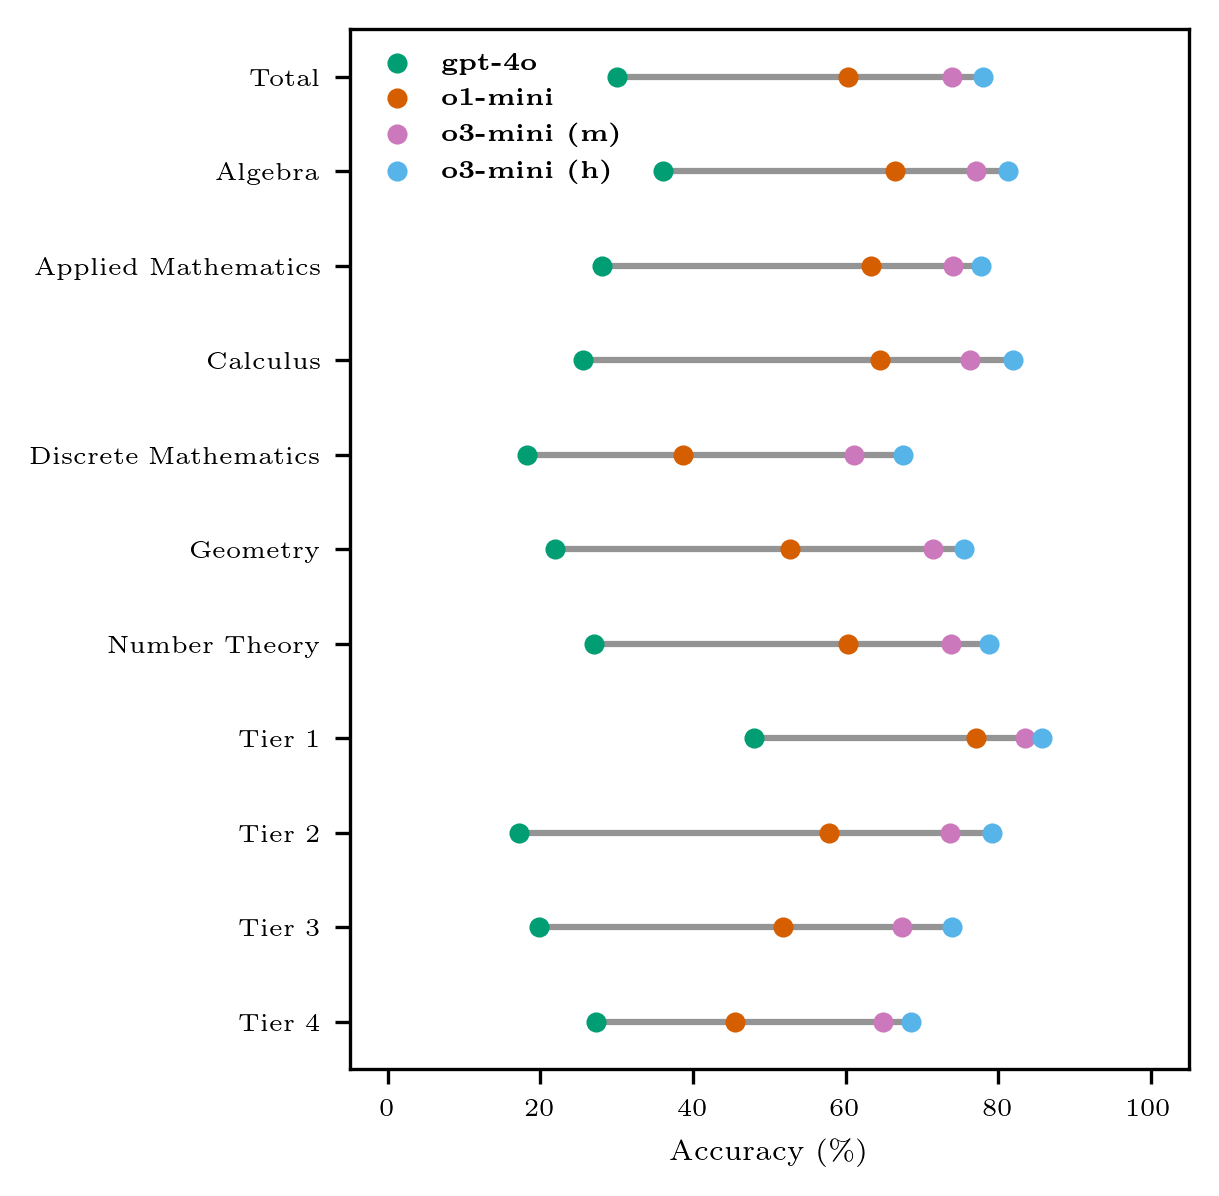

In [3]:
LABELS = ['Tier 4', 'Tier 3','Tier 2', 'Tier 1', 'Number Theory', 'Geometry','Discrete Mathematics', 'Calculus',  'Applied Mathematics', 'Algebra','Total']
x_positions = np.arange(len(LABELS))

### Plot: Accuracy comparison
fig1,ax1 = plt.subplots(figsize=(6.5/1.8, 9/2), dpi=300)

sns.scatterplot(ax=ax1, y=x_positions, x=Accuracy_dict_4o.values(), color='#029e73', label=r'\textbf{gpt-4o}', s=20, zorder = 2, alpha = 1, edgecolor= None)
sns.scatterplot(ax=ax1, y=x_positions, x=Accuracy_dict_o1.values(), color='#d55e00', label=r'\textbf{o1-mini}', s=20, zorder=2, alpha=1, edgecolor = None)
sns.scatterplot(ax=ax1, y=x_positions, x=Accuracy_dict_o3.values(), color='#cc78bc', label=r'\textbf{o3-mini (m)}', s=20, zorder=2, alpha = 1, edgecolor = None)
sns.scatterplot(ax=ax1, y=x_positions, x=Accuracy_dict_o3_high.values(), color='#56b4e9', label=r'\textbf{o3-mini (h)}', s=20, zorder=2, alpha = 1, edgecolor = None)
ax1.set_xlim(0-5,100+5)
ax1.set_yticks(x_positions)
ax1.set_yticklabels(LABELS, fontsize=6)
ax1.set_ylim([-0.5, max(x_positions) + 0.5])
ax1.set_xlabel(r'Accuracy (\%)', fontsize=7)
ax1.set_xticks([0, 20, 40, 60, 80, 100 ])
ax1.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=6)

for i in range(len(LABELS)):
    sns.lineplot(ax=ax1,y=[i,i], x=[list(Accuracy_dict_4o.values())[i], list(Accuracy_dict_o1.values())[i]], color='#949494', linewidth=1.5, alpha=1, errorbar=None, estimator=None, zorder=1)
    sns.lineplot(ax=ax1, y=[i,i], x=[list(Accuracy_dict_o1.values())[i], list(Accuracy_dict_o3.values())[i]], color='#949494', linewidth=1.5, alpha=1, errorbar=None, estimator=None, zorder=1)
    sns.lineplot(ax=ax1, y=[i,i], x=[list(Accuracy_dict_o3.values())[i], list(Accuracy_dict_o3_high.values())[i]], color='#949494', linewidth=1.5, alpha=1, errorbar=None, estimator=None, zorder=1)


legend = ax1.legend(loc='upper left',
                    fancybox=False, ncol=1, fontsize=6, frameon=False)
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.savefig('Figure1.png', bbox_inches='tight', dpi=300)
plt.show()


# Figure 2

Cross-sectional performance evaluation and relative reasoning token use of gpt-4o, o1-mini, o3-mini (m) and o3-mini (h) on the Omni-MATH benchmark.

In [4]:
#Calculate cross-sectional accuracy scores and average token use per section
#First run the cells of Figure 1 to load the necessary data
from performance_eval import domain_per_difficulty_performance, domain_per_difficulty_tokens, difficulty_tokens, total_tokens

TIERS = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4']
DOMAINS = ['Algebra', 'Applied Mathematics', 'Calculus', 'Discrete Mathematics', 'Geometry', 'Number Theory']

#======================================================== gpt-4o ========================================================
domain_per_difficulty_performance_4o = domain_per_difficulty_performance('omni-judge_output_4o.jsonl')

acc_T1 = []
acc_T2 = []
acc_T3 = []
acc_T4 = []

for domain in DOMAINS:
    acc_T1.append(domain_per_difficulty_performance_4o[TIERS[0]][domain]['accuracy'])
    acc_T2.append(domain_per_difficulty_performance_4o[TIERS[1]][domain]['accuracy'])
    acc_T3.append(domain_per_difficulty_performance_4o[TIERS[2]][domain]['accuracy'])
    acc_T4.append(domain_per_difficulty_performance_4o[TIERS[3]][domain]['accuracy'])

dataframe_acc = pd.DataFrame(zip(acc_T1, acc_T2, acc_T3, acc_T4), columns=TIERS, index=DOMAINS)
dataframe_acc_reset = dataframe_acc.reset_index()

#Rename the 'index' column to 'Domain'
dataframe_acc_reset = dataframe_acc_reset.rename(columns={'index': 'Domain'})

#Melt the DataFrame to long format
dataframe_acc_4o = pd.melt(
    dataframe_acc_reset,
    id_vars=['Domain'],
    value_vars=['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'],
    var_name='Tier',
    value_name='Accuracy'
)

#Compute difficulty specific accuracy without double counting the multi-domain questions
extra_row_data_4o = {
    "0": {'Tier': 'Tier 1', "Accuracy": difficulty_accuracy_4o['Tier 1']['accuracy']},  
    "1": {'Tier': 'Tier 2', "Accuracy": difficulty_accuracy_4o['Tier 2']['accuracy']},
    "2": {'Tier': 'Tier 3', "Accuracy": difficulty_accuracy_4o['Tier 3']['accuracy']},
    "3": {'Tier': 'Tier 4', "Accuracy": difficulty_accuracy_4o['Tier 4']['accuracy']},
}
tier_df_4o = pd.DataFrame(extra_row_data_4o).T

#Average over the rows to get the average accuracy per domain (multi-domain questions are counted for each domain)
avg_acc_Alg = (acc_T1[0] + acc_T2[0] + acc_T3[0] + acc_T4[0]) / 4
avg_acc_Applied = (acc_T1[1] + acc_T2[1] + acc_T3[1] + acc_T4[1]) / 4
avg_acc_Calc = (acc_T1[2] + acc_T2[2] + acc_T3[2] + acc_T4[2]) / 4
avg_acc_Discrete = (acc_T1[3] + acc_T2[3] + acc_T3[3] + acc_T4[3]) / 4
avg_acc_Geo = (acc_T1[4] + acc_T2[4] + acc_T3[4] + acc_T4[4]) / 4
avg_acc_Num = (acc_T1[5] + acc_T2[5] + acc_T3[5] + acc_T4[5]) / 4

extra_column_data_4o = {
    "0": {'Domain': 'Algebra', "Accuracy": avg_acc_Alg},
    "1": {'Domain': "Applied Mathematics", "Accuracy": avg_acc_Applied},
    "2": {'Domain': 'Calculus', "Accuracy": avg_acc_Calc},
    "3": {'Domain': 'Discrete Mathematics', "Accuracy": avg_acc_Discrete},
    "4": {'Domain': 'Geometry', "Accuracy": avg_acc_Geo},
    "5": {'Domain': 'Number Theory', "Accuracy": avg_acc_Num},
}
domain_df_4o = pd.DataFrame(extra_column_data_4o).T

#Compute total accuracy without double counting the multi-domain questions
total_avg_acc_4o = total_accuracy_4o['accuracy']

#======================================================== o1-mini ========================================================
domain_per_difficulty_performance_o1 = domain_per_difficulty_performance('omni-judge_output_o1.jsonl')
domain_per_difficulty_tokens_o1 = domain_per_difficulty_tokens('omni-judge_output_o1.jsonl')
difficulty_tokens_o1 = difficulty_tokens('omni-judge_output_o1.jsonl')
total_tokens_o1 = total_tokens('omni-judge_output_o1.jsonl')

acc_T1 = []
acc_T2 = []
acc_T3 = []
acc_T4 = []
avg_T1 = []
avg_T2 = []
avg_T3 = []
avg_T4 = []

for domain in DOMAINS:
    acc_T1.append(domain_per_difficulty_performance_o1[TIERS[0]][domain]['accuracy'])
    acc_T2.append(domain_per_difficulty_performance_o1[TIERS[1]][domain]['accuracy'])
    acc_T3.append(domain_per_difficulty_performance_o1[TIERS[2]][domain]['accuracy'])
    acc_T4.append(domain_per_difficulty_performance_o1[TIERS[3]][domain]['accuracy'])
    avg_T1.append(domain_per_difficulty_tokens_o1[TIERS[0]][domain]['avg'])
    avg_T2.append(domain_per_difficulty_tokens_o1[TIERS[1]][domain]['avg'])
    avg_T3.append(domain_per_difficulty_tokens_o1[TIERS[2]][domain]['avg'])
    avg_T4.append(domain_per_difficulty_tokens_o1[TIERS[3]][domain]['avg'])

#Create DataFrame for Accuracies
dataframe_acc = pd.DataFrame(
    zip(acc_T1, acc_T2, acc_T3, acc_T4), 
    columns=TIERS, 
    index=DOMAINS
)

#Create DataFrame for Average Reasoning Tokens
dataframe_avg = pd.DataFrame(
    zip(avg_T1, avg_T2, avg_T3, avg_T4), 
    columns=TIERS, 
    index=DOMAINS
)

#Reset index to turn Domains into a column
df_acc = dataframe_acc.reset_index().melt(id_vars='index', var_name='Tier', value_name='Accuracy')
df_tokens = dataframe_avg.reset_index().melt(id_vars='index', var_name='Tier', value_name='Avg_Tokens')

#Merge the two DataFrames on Domain and Tier
dataframe_acc_o1 = pd.merge(df_acc, df_tokens, on=['index', 'Tier'])
dataframe_acc_o1.rename(columns={'index': 'Domain'}, inplace=True)

#Average over the rows to get the average accuracy and tokens per domain (multi-domain questions are counted for each domain)
avg_acc_Alg = (acc_T1[0] + acc_T2[0] + acc_T3[0] + acc_T4[0]) / 4
avg_acc_Applied = (acc_T1[1] + acc_T2[1] + acc_T3[1] + acc_T4[1]) / 4
avg_acc_Calc = (acc_T1[2] + acc_T2[2] + acc_T3[2] + acc_T4[2]) / 4
avg_acc_Discrete = (acc_T1[3] + acc_T2[3] + acc_T3[3] + acc_T4[3]) / 4
avg_acc_Geo = (acc_T1[4] + acc_T2[4] + acc_T3[4] + acc_T4[4]) / 4
avg_acc_Num = (acc_T1[5] + acc_T2[5] + acc_T3[5] + acc_T4[5]) / 4

avg_tokens_Alg = (avg_T1[0] + avg_T2[0] + avg_T3[0] + avg_T4[0]) / 4
avg_tokens_Applied = (avg_T1[1] + avg_T2[1] + avg_T3[1] + avg_T4[1]) / 4
avg_tokens_Calc = (avg_T1[2] + avg_T2[2] + avg_T3[2] + avg_T4[2]) / 4
avg_tokens_Discrete = (avg_T1[3] + avg_T2[3] + avg_T3[3] + avg_T4[3]) / 4
avg_tokens_Geo = (avg_T1[4] + avg_T2[4] + avg_T3[4] + avg_T4[4]) / 4
avg_tokens_Num = (avg_T1[5] + avg_T2[5] + avg_T3[5] + avg_T4[5]) / 4

extra_column_data_o1 = {
    "0": {'Domain': 'Algebra', "Accuracy": avg_acc_Alg, "avg tokens": round(avg_tokens_Alg)},
    "1": {'Domain': "Applied Mathematics", "Accuracy": avg_acc_Applied, "avg tokens": round(avg_tokens_Applied)},
    "2": {'Domain': 'Calculus', "Accuracy": avg_acc_Calc, "avg tokens": round(avg_tokens_Calc)},
    "3": {'Domain': 'Discrete Mathematics', "Accuracy": avg_acc_Discrete, "avg tokens": round(avg_tokens_Discrete)},
    "4": {'Domain': 'Geometry', "Accuracy": avg_acc_Geo, "avg tokens": round(avg_tokens_Geo)},
    "5": {'Domain': 'Number Theory', "Accuracy": avg_acc_Num, "avg tokens": round(avg_tokens_Num)},
}
domain_df_o1 = pd.DataFrame(extra_column_data_o1).T

#Compute difficulty specific accuracy and tokens without double counting the multi-domain questions
extra_row_data_o1 = {
    "0": {'Tier': 'Tier 1', "Accuracy": difficulty_accuracy_o1['Tier 1']['accuracy'], "avg tokens": difficulty_tokens_o1['Tier 1']['avg']},
    "1": {'Tier': 'Tier 2', "Accuracy": difficulty_accuracy_o1['Tier 2']['accuracy'], "avg tokens": difficulty_tokens_o1['Tier 2']['avg']},
    "2": {'Tier': 'Tier 3', "Accuracy": difficulty_accuracy_o1['Tier 3']['accuracy'], "avg tokens": difficulty_tokens_o1['Tier 3']['avg']},
    "3": {'Tier': 'Tier 4', "Accuracy": difficulty_accuracy_o1['Tier 4']['accuracy'], "avg tokens": difficulty_tokens_o1['Tier 4']['avg']},
}
tier_df_o1 = pd.DataFrame(extra_row_data_o1).T

#Compute total accuracy and tokens without double counting the multi-domain questions
total_avg_acc_o1 = total_accuracy_o1['accuracy']
total_avg_tokens_o1 = total_tokens_o1['avg']

#======================================================== o3-mini ========================================================
domain_per_difficulty_performance_o3 = domain_per_difficulty_performance('omni-judge_output_o3.jsonl')
domain_per_difficulty_tokens_o3 = domain_per_difficulty_tokens('omni-judge_output_o3.jsonl')
difficulty_tokens_o3 = difficulty_tokens('omni-judge_output_o3.jsonl')
total_tokens_o3 = total_tokens('omni-judge_output_o3.jsonl')

acc_T1 = []
acc_T2 = []
acc_T3 = []
acc_T4 = []
avg_T1 = []
avg_T2 = []
avg_T3 = []
avg_T4 = []

for domain in DOMAINS:
    acc_T1.append(domain_per_difficulty_performance_o3[TIERS[0]][domain]['accuracy'])
    acc_T2.append(domain_per_difficulty_performance_o3[TIERS[1]][domain]['accuracy'])
    acc_T3.append(domain_per_difficulty_performance_o3[TIERS[2]][domain]['accuracy'])
    acc_T4.append(domain_per_difficulty_performance_o3[TIERS[3]][domain]['accuracy'])
    avg_T1.append(domain_per_difficulty_tokens_o3[TIERS[0]][domain]['avg'])
    avg_T2.append(domain_per_difficulty_tokens_o3[TIERS[1]][domain]['avg'])
    avg_T3.append(domain_per_difficulty_tokens_o3[TIERS[2]][domain]['avg'])
    avg_T4.append(domain_per_difficulty_tokens_o3[TIERS[3]][domain]['avg'])

#Create DataFrame for Accuracies
dataframe_acc = pd.DataFrame(
    zip(acc_T1, acc_T2, acc_T3, acc_T4), 
    columns=TIERS, 
    index=DOMAINS
)

#Create DataFrame for Average Reasoning Tokens
dataframe_avg = pd.DataFrame(
    zip(avg_T1, avg_T2, avg_T3, avg_T4), 
    columns=TIERS, 
    index=DOMAINS
)

#Reset index to turn Domains into a column
df_acc = dataframe_acc.reset_index().melt(id_vars='index', var_name='Tier', value_name='Accuracy')
df_tokens = dataframe_avg.reset_index().melt(id_vars='index', var_name='Tier', value_name='Avg_Tokens')

#Merge the two DataFrames on Domain and Tier
dataframe_acc_o3 = pd.merge(df_acc, df_tokens, on=['index', 'Tier'])
dataframe_acc_o3.rename(columns={'index': 'Domain'}, inplace=True)

#Average over the rows to get the average accuracy and tokens per domain (multi-domain questions are counted for each domain)
avg_acc_Alg = (acc_T1[0] + acc_T2[0] + acc_T3[0] + acc_T4[0]) / 4
avg_acc_Applied = (acc_T1[1] + acc_T2[1] + acc_T3[1] + acc_T4[1]) / 4
avg_acc_Calc = (acc_T1[2] + acc_T2[2] + acc_T3[2] + acc_T4[2]) / 4
avg_acc_Discrete = (acc_T1[3] + acc_T2[3] + acc_T3[3] + acc_T4[3]) / 4
avg_acc_Geo = (acc_T1[4] + acc_T2[4] + acc_T3[4] + acc_T4[4]) / 4
avg_acc_Num = (acc_T1[5] + acc_T2[5] + acc_T3[5] + acc_T4[5]) / 4

avg_tokens_Alg = (avg_T1[0] + avg_T2[0] + avg_T3[0] + avg_T4[0]) / 4
avg_tokens_Applied = (avg_T1[1] + avg_T2[1] + avg_T3[1] + avg_T4[1]) / 4
avg_tokens_Calc = (avg_T1[2] + avg_T2[2] + avg_T3[2] + avg_T4[2]) / 4
avg_tokens_Discrete = (avg_T1[3] + avg_T2[3] + avg_T3[3] + avg_T4[3]) / 4
avg_tokens_Geo = (avg_T1[4] + avg_T2[4] + avg_T3[4] + avg_T4[4]) / 4
avg_tokens_Num = (avg_T1[5] + avg_T2[5] + avg_T3[5] + avg_T4[5]) / 4

extra_column_data_o3 = {
    "0": {'Domain': 'Algebra', "Accuracy": avg_acc_Alg, "avg tokens": round(avg_tokens_Alg)},
    "1": {'Domain': "Applied Mathematics", "Accuracy": avg_acc_Applied, "avg tokens": round(avg_tokens_Applied)},
    "2": {'Domain': 'Calculus', "Accuracy": avg_acc_Calc, "avg tokens": round(avg_tokens_Calc)},
    "3": {'Domain': 'Discrete Mathematics', "Accuracy": avg_acc_Discrete, "avg tokens": round(avg_tokens_Discrete)},
    "4": {'Domain': 'Geometry', "Accuracy": avg_acc_Geo, "avg tokens": round(avg_tokens_Geo)},
    "5": {'Domain': 'Number Theory', "Accuracy": avg_acc_Num, "avg tokens": round(avg_tokens_Num)},
}
domain_df_o3 = pd.DataFrame(extra_column_data_o3).T

#Compute difficulty specific accuracy and tokens without double counting the multi-domain questions
extra_row_data_o3 = {
    "0": {'Tier': 'Tier 1', "Accuracy": difficulty_accuracy_o3['Tier 1']['accuracy'], "avg tokens": difficulty_tokens_o3['Tier 1']['avg']},
    "1": {'Tier': 'Tier 2', "Accuracy": difficulty_accuracy_o3['Tier 2']['accuracy'], "avg tokens": difficulty_tokens_o3['Tier 2']['avg']},
    "2": {'Tier': 'Tier 3', "Accuracy": difficulty_accuracy_o3['Tier 3']['accuracy'], "avg tokens": difficulty_tokens_o3['Tier 3']['avg']},
    "3": {'Tier': 'Tier 4', "Accuracy": difficulty_accuracy_o3['Tier 4']['accuracy'], "avg tokens": difficulty_tokens_o3['Tier 4']['avg']},
}
tier_df_o3 = pd.DataFrame(extra_row_data_o3).T

#Compute total accuracy and tokens without double counting the multi-domain questions
total_avg_acc_o3 = total_accuracy_o3['accuracy']
total_avg_tokens_o3 = total_tokens_o3['avg']

#======================================================== o3-mini-high ========================================================
domain_per_difficulty_performance_o3_high = domain_per_difficulty_performance('omni-judge_output_o3_high.jsonl')
domain_per_difficulty_tokens_o3_high = domain_per_difficulty_tokens('omni-judge_output_o3_high.jsonl')
difficulty_tokens_o3_high = difficulty_tokens('omni-judge_output_o3_high.jsonl')
total_tokens_o3_high = total_tokens('omni-judge_output_o3_high.jsonl')

acc_T1 = []
acc_T2 = []
acc_T3 = []
acc_T4 = []
avg_T1 = []
avg_T2 = []
avg_T3 = []
avg_T4 = []

for domain in DOMAINS:
    acc_T1.append(domain_per_difficulty_performance_o3_high[TIERS[0]][domain]['accuracy'])
    acc_T2.append(domain_per_difficulty_performance_o3_high[TIERS[1]][domain]['accuracy'])
    acc_T3.append(domain_per_difficulty_performance_o3_high[TIERS[2]][domain]['accuracy'])
    acc_T4.append(domain_per_difficulty_performance_o3_high[TIERS[3]][domain]['accuracy'])
    avg_T1.append(domain_per_difficulty_tokens_o3_high[TIERS[0]][domain]['avg'])
    avg_T2.append(domain_per_difficulty_tokens_o3_high[TIERS[1]][domain]['avg'])
    avg_T3.append(domain_per_difficulty_tokens_o3_high[TIERS[2]][domain]['avg'])
    avg_T4.append(domain_per_difficulty_tokens_o3_high[TIERS[3]][domain]['avg'])

#Create DataFrame for Accuracies
dataframe_acc = pd.DataFrame(
    zip(acc_T1, acc_T2, acc_T3, acc_T4), 
    columns=TIERS, 
    index=DOMAINS
)

#Create DataFrame for Average Reasoning Tokens
dataframe_avg = pd.DataFrame(
    zip(avg_T1, avg_T2, avg_T3, avg_T4), 
    columns=TIERS, 
    index=DOMAINS
)

#Reset index to turn Domains into a column
df_acc = dataframe_acc.reset_index().melt(id_vars='index', var_name='Tier', value_name='Accuracy')
df_tokens = dataframe_avg.reset_index().melt(id_vars='index', var_name='Tier', value_name='Avg_Tokens')

#Merge the two DataFrames on Domain and Tier
dataframe_acc_o3_high = pd.merge(df_acc, df_tokens, on=['index', 'Tier'])
dataframe_acc_o3_high.rename(columns={'index': 'Domain'}, inplace=True)

#Average over the rows to get the average accuracy and tokens per domain (multi-domain questions are counted for each domain)
avg_acc_Alg = (acc_T1[0] + acc_T2[0] + acc_T3[0] + acc_T4[0]) / 4
avg_acc_Applied = (acc_T1[1] + acc_T2[1] + acc_T3[1] + acc_T4[1]) / 4
avg_acc_Calc = (acc_T1[2] + acc_T2[2] + acc_T3[2] + acc_T4[2]) / 4
avg_acc_Discrete = (acc_T1[3] + acc_T2[3] + acc_T3[3] + acc_T4[3]) / 4
avg_acc_Geo = (acc_T1[4] + acc_T2[4] + acc_T3[4] + acc_T4[4]) / 4
avg_acc_Num = (acc_T1[5] + acc_T2[5] + acc_T3[5] + acc_T4[5]) / 4       

avg_tokens_Alg = (avg_T1[0] + avg_T2[0] + avg_T3[0] + avg_T4[0]) / 4
avg_tokens_Applied = (avg_T1[1] + avg_T2[1] + avg_T3[1] + avg_T4[1]) / 4
avg_tokens_Calc = (avg_T1[2] + avg_T2[2] + avg_T3[2] + avg_T4[2]) / 4   
avg_tokens_Discrete = (avg_T1[3] + avg_T2[3] + avg_T3[3] + avg_T4[3]) / 4
avg_tokens_Geo = (avg_T1[4] + avg_T2[4] + avg_T3[4] + avg_T4[4]) / 4
avg_tokens_Num = (avg_T1[5] + avg_T2[5] + avg_T3[5] + avg_T4[5]) / 4

extra_column_data_o3_high = {
    "0": {'Domain': 'Algebra', "Accuracy": avg_acc_Alg, "avg tokens": round(avg_tokens_Alg)},
    "1": {'Domain': "Applied Mathematics", "Accuracy": avg_acc_Applied, "avg tokens": round(avg_tokens_Applied)},
    "2": {'Domain': 'Calculus', "Accuracy": avg_acc_Calc, "avg tokens": round(avg_tokens_Calc)},
    "3": {'Domain': 'Discrete Mathematics', "Accuracy": avg_acc_Discrete, "avg tokens": round(avg_tokens_Discrete)},
    "4": {'Domain': 'Geometry', "Accuracy": avg_acc_Geo, "avg tokens": round(avg_tokens_Geo)},
    "5": {'Domain': 'Number Theory', "Accuracy": avg_acc_Num, "avg tokens": round(avg_tokens_Num)},
}
domain_df_o3_high = pd.DataFrame(extra_column_data_o3_high).T

#Compute difficulty specific accuracy and tokens without double counting the multi-domain questions
extra_row_data_o3_high = {
    "0": {'Tier': 'Tier 1', "Accuracy": difficulty_accuracy_o3_high['Tier 1']['accuracy'], "avg tokens": difficulty_tokens_o3_high['Tier 1']['avg']},
    "1": {'Tier': 'Tier 2', "Accuracy": difficulty_accuracy_o3_high['Tier 2']['accuracy'], "avg tokens": difficulty_tokens_o3_high['Tier 2']['avg']},
    "2": {'Tier': 'Tier 3', "Accuracy": difficulty_accuracy_o3_high['Tier 3']['accuracy'], "avg tokens": difficulty_tokens_o3_high['Tier 3']['avg']},
    "3": {'Tier': 'Tier 4', "Accuracy": difficulty_accuracy_o3_high['Tier 4']['accuracy'], "avg tokens": difficulty_tokens_o3_high['Tier 4']['avg']},
}
tier_df_o3_high = pd.DataFrame(extra_row_data_o3_high).T    

#Compute total accuracy and tokens without double counting the multi-domain questions
total_avg_acc_o3_high = total_accuracy_o3_high['accuracy']
total_avg_tokens_o3_high = total_tokens_o3_high['avg']

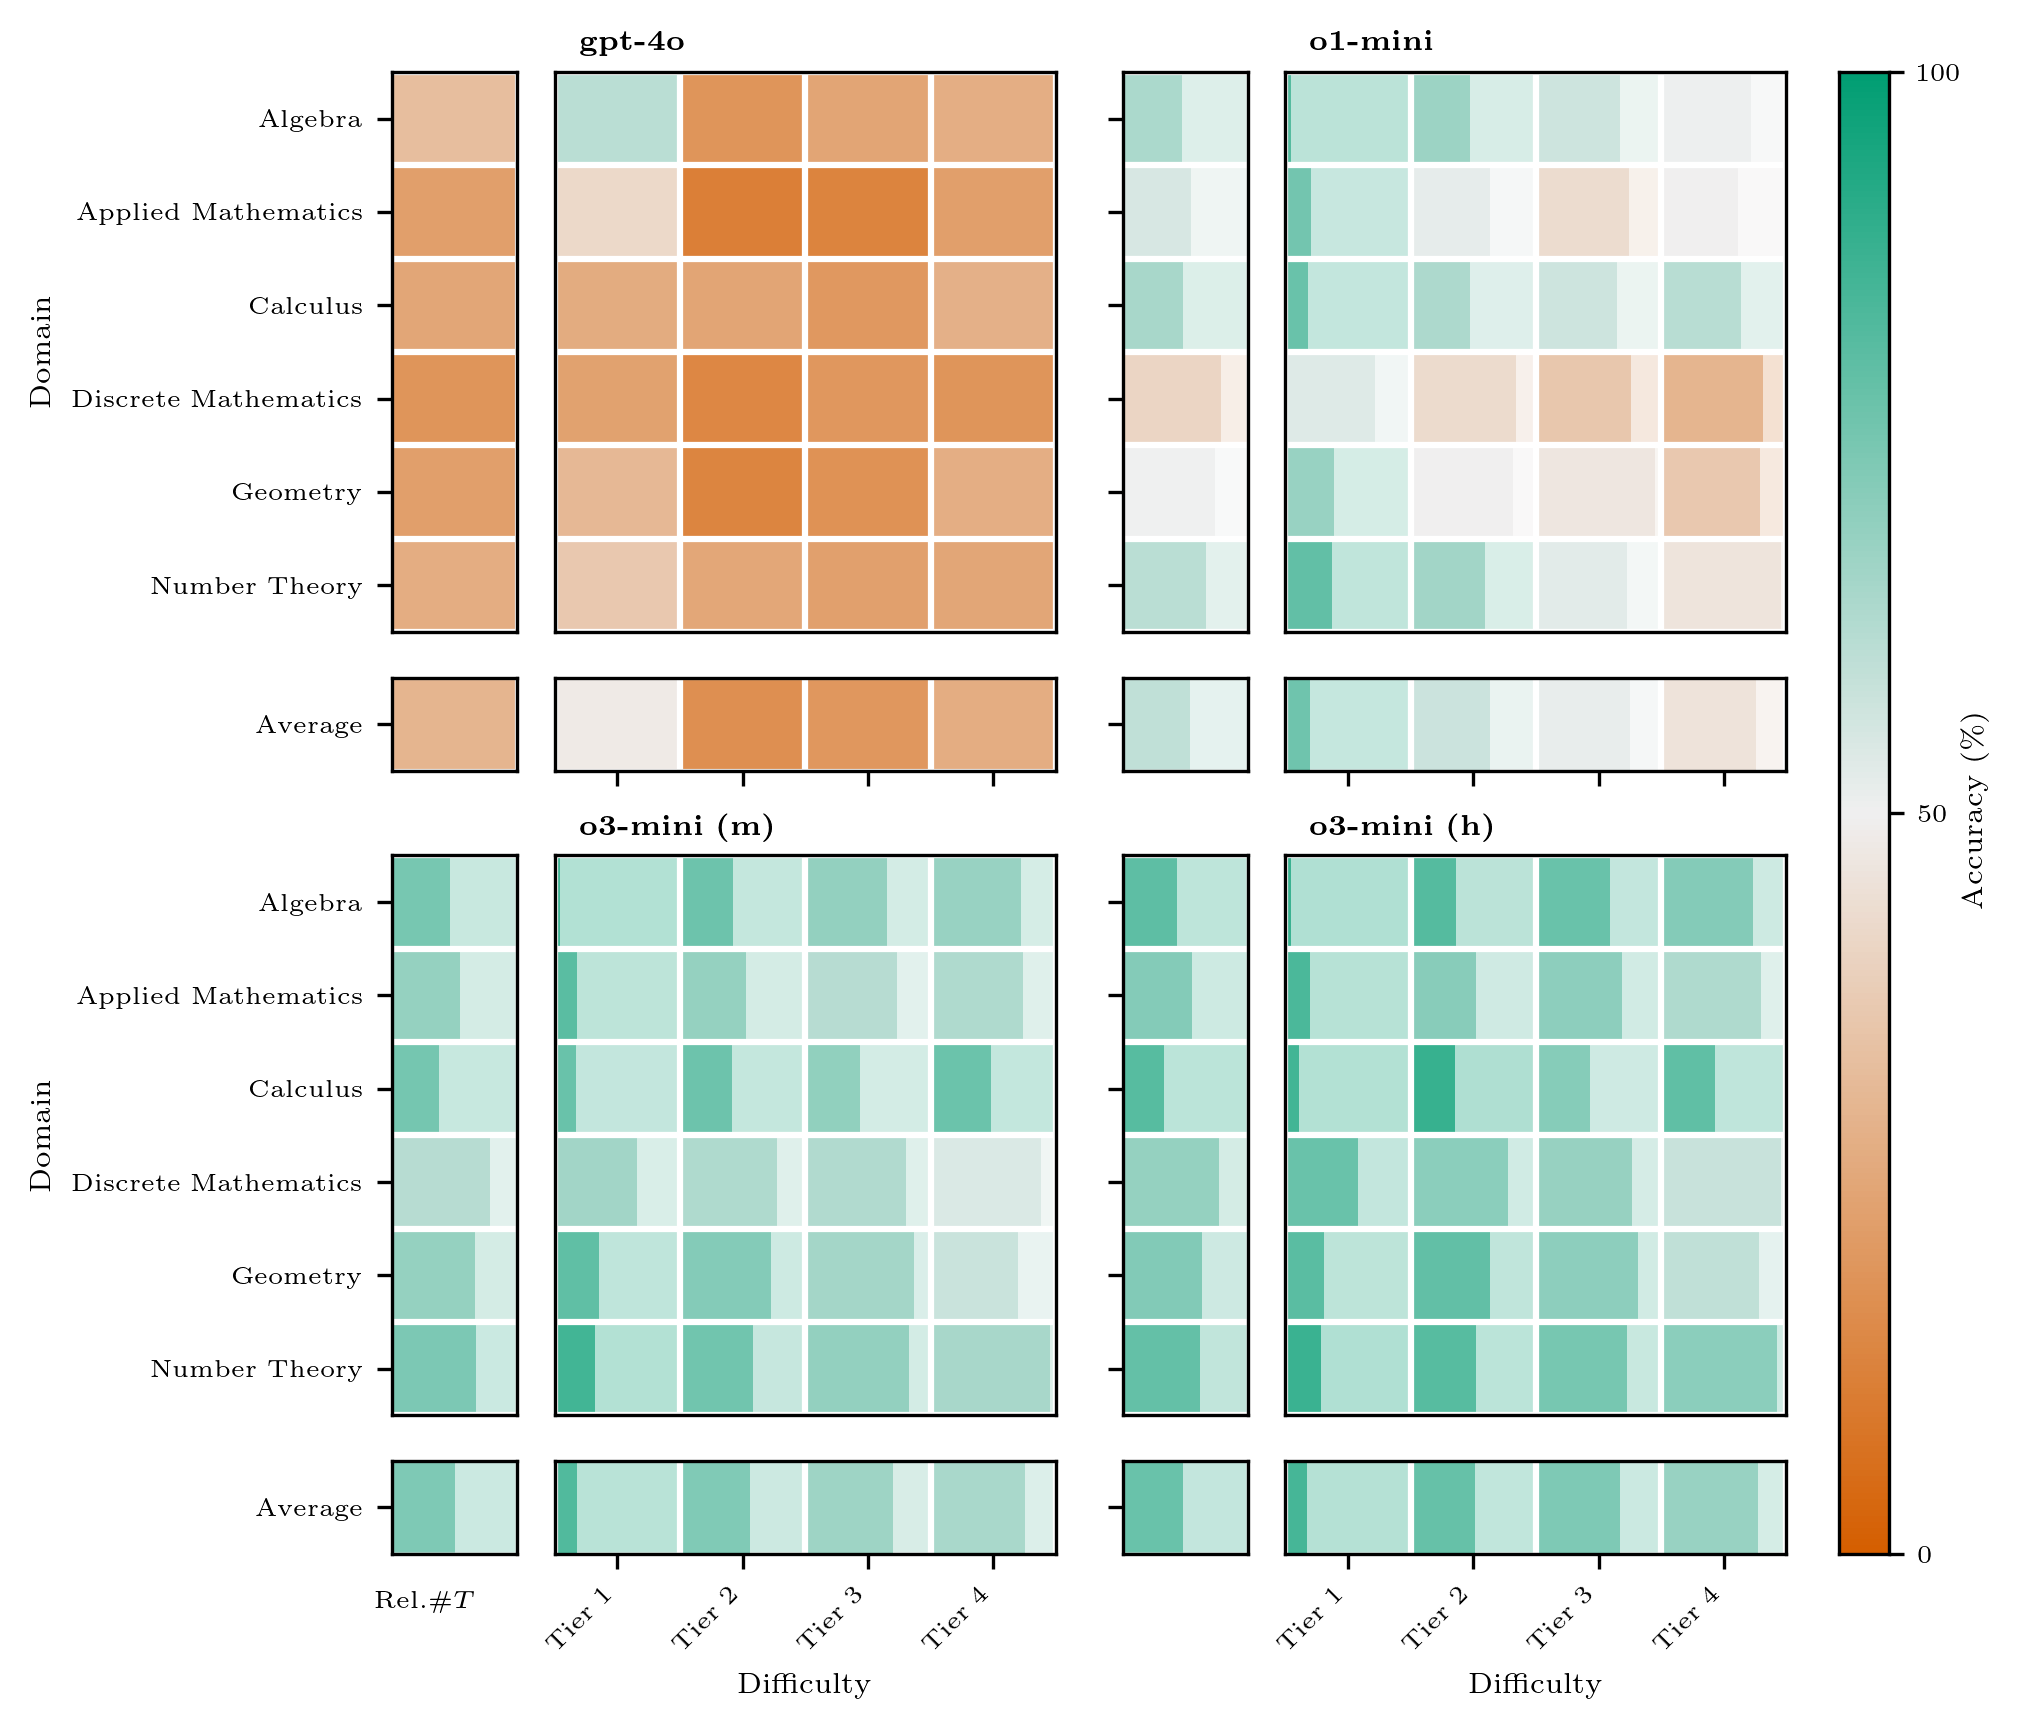

In [5]:
### Plot: Cross-sectional performance and relative tokens use
fig2, ax2 = plt.subplot_mosaic([['A1', 'A2', 'B1', 'B2', 'C'], ['A3', 'A4', 'B3', 'B4', 'C'], ['C1', 'C2', 'D1', 'D2', 'C'], ['C3', 'C4', 'D3', 'D4', 'C']],
                                  figsize = (6.5, 6.5),
                                  gridspec_kw={'height_ratios': [1, 0.166, 1, 0.166], 'width_ratios': [0.25,1, 0.25, 1, 0.1], 'wspace': 0.2, 'hspace': 0.2},
                                  dpi = 300)


#Define custom color palette
color_red = "#D55E00"   
color_green = "#009E73"  
color_mid = "#F0F0F0" 

custom_cmap = LinearSegmentedColormap.from_list(
    name='custom_diverging',
    colors=[color_red, color_mid, color_green],
    N=256  # Number of color levels
)

num_colors = 256  
palette_custom = [custom_cmap(i / (num_colors - 1)) for i in range(num_colors)]

#Import auxiliary function that converts accuracy scores to cmap color
from performance_eval import value_to_color, value_to_progress

#======================================================== gpt-4o ========================================================
ax2['A2'].text(0.05, 1.075, r'\textbf{gpt-4o}', horizontalalignment='left', weight= 'bold',
                  verticalalignment='top', transform=ax2['A2'].transAxes, fontsize=7
                  )

color = dataframe_acc_4o['Accuracy']
color_range = [0, 100]
color_min = color_range[0]
color_max = color_range[1]
x_names = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4']
x_to_num = {p[1]: p[0] for p in enumerate(x_names)}
y_names = ['Number Theory', 'Geometry', 'Discrete Mathematics', 'Calculus', 'Applied Mathematics', 'Algebra']
y_to_num = {p[1]: p[0] for p in enumerate(y_names)}

### Plot A2: Domain x Tier Heatmap
for x_val, y_val, color_val in zip(dataframe_acc_4o['Tier'], dataframe_acc_4o['Domain'], dataframe_acc_4o['Accuracy']):
    x_pos = x_to_num[x_val]
    y_pos = y_to_num[y_val]
    color_fill = value_to_color(color_val, palette_custom, color_min, color_max, num_colors)

    #Draw the cell background
    ax2['A2'].add_patch(patches.Rectangle((x_pos - 0.5, y_pos - 0.5), 1, 1, color=color_fill, ec='white'))


#Draw gridlines
for x_tick in range(len(x_names) + 1):
    ax2['A2'].axvline(x_tick - 0.5, color='white', linewidth=1.5)
for y_tick in range(len(y_names) + 1):
    ax2['A2'].axhline(y_tick - 0.5, color='white', linewidth=1.5)

#Set axis labels and ticks
ax2['A2'].set_xticks([])
ax2['A2'].set_yticks([])
ax2['A2'].set_xlim([-0.5, max(x_to_num.values()) + 0.5])
ax2['A2'].set_ylim([-0.5, max(y_to_num.values()) + 0.5])
ax2['A2'].grid(False)

### Plot A1: Domain Average (extra column)
for y_val, color_val in zip(domain_df_4o['Domain'], domain_df_4o['Accuracy']):
        y_pos = y_to_num[y_val]
        x_pos = 0
        color_fill = value_to_color(color_val, palette_custom, color_min, color_max, num_colors)

        #Draw the cell background
        ax2['A1'].add_patch(patches.Rectangle((x_pos - 0.5, y_pos - 0.5), 1, 1, color=color_fill, ec='white'))
    
#Draw gridlines
for y_tick in range(len(y_names) + 1):
    ax2['A1'].axhline(y_tick - 0.5, color='white', linewidth=1.5)

#Set axis labels and ticks
ax2['A1'].set_xticks([])
ax2['A1'].set_yticks([y_to_num[v] for v in y_names])
ax2['A1'].set_yticklabels(y_names, fontsize=6)
ax2['A1'].set_ylim([-0.5, max(y_to_num.values()) + 0.5])
ax2['A1'].set_xlim(-0.5, 0.5)
ax2['A1'].grid(False)

ax2['A1'].set_ylabel('Domain', fontsize=7)

### Plot A4: Tier Average (extra row)
for x_val, color_val in zip(tier_df_4o['Tier'], tier_df_4o['Accuracy']):
    x_pos = x_to_num[x_val]
    y_pos = 0
    color_fill = value_to_color(color_val, palette_custom, color_min, color_max, num_colors)

    #Draw the cell background
    ax2['A4'].add_patch(patches.Rectangle((x_pos - 0.5, y_pos - 0.5), 1, 1, color=color_fill, ec='white'))
    
for x_tick in range(len(x_names) + 1):
    ax2['A4'].axvline(x_tick - 0.5, color='white', linewidth=1.5)
    
ax2['A4'].set_xticks([x_to_num[v] for v in x_names])
ax2['A4'].set_xticklabels([], rotation=45, ha='right', fontsize=6)
ax2['A4'].set_yticks([])
ax2['A4'].set_xlim([-0.5, max(x_to_num.values()) + 0.5])
ax2['A4'].set_ylim(-0.5, 0.5)
ax2['A4'].grid(False)

ax2['A4'].set_xlabel('', fontsize=7)

### Plot A3: Total Average (extra cell)
color_fill = value_to_color(total_avg_acc_4o, palette_custom, color_min, color_max, num_colors)
ax2['A3'].add_patch(patches.Rectangle((- 0.5, -0.5), 1, 1, color=color_fill, ec='white'))
ax2['A3'].set_xlim(-0.5, 0.5)
ax2['A3'].set_ylim(-0.5, 0.5)
ax2['A3'].set_xticks([])
ax2['A3'].set_yticks([0])
ax2['A3'].set_yticklabels(['Average'], fontsize=6)



#======================================================== o1-mini ========================================================
size = dataframe_acc_o1['Avg_Tokens']
color = dataframe_acc_o1['Accuracy']
margin = (max(size) - min(size)) * 0.05
size_min, size_max = min(size)-margin, max(size)+margin
pos_scale = 1000

ax2['B2'].text(0.05, 1.075, r'\textbf{o1-mini}', horizontalalignment='left', weight= 'bold',
                    verticalalignment='top', transform=ax2['B2'].transAxes, fontsize=7
                    )

### Plot B2: Domain x Tier Heatmap
for x_val, y_val, size_val, color_val in zip(dataframe_acc_o1['Tier'], dataframe_acc_o1['Domain'], size, color):
        x_pos = x_to_num[x_val]
        y_pos = y_to_num[y_val]
        progress = value_to_progress(size_val, size_min, size_max)
        color_fill = value_to_color(color_val, palette_custom, color_min, color_max, num_colors)

        #Draw the cell background
        ax2['B2'].add_patch(patches.Rectangle((x_pos - 0.5, y_pos - 0.5), 1, 1, color=color_fill, ec='white', alpha=0.4))

        #Draw the progress bar
        ax2['B2'].add_patch(
            patches.Rectangle((x_pos - 0.5, y_pos - 0.5), progress, 1, color=color_fill, ec=None)
        )
#Draw gridlines
for x_tick in range(len(x_names) + 1):
    ax2['B2'].axvline(x_tick - 0.5, color='white', linewidth=1.5)
for y_tick in range(len(y_names) + 1):
    ax2['B2'].axhline(y_tick - 0.5, color='white', linewidth=1.5)

#Set axis labels and ticks
ax2['B2'].set_xticks([])
ax2['B2'].set_yticks([])
ax2['B2'].set_xlim([-0.5, max(x_to_num.values()) + 0.5])
ax2['B2'].set_ylim([-0.5, max(y_to_num.values()) + 0.5])
ax2['B2'].grid(False)

### Plot B1: Domain Average (extra column)
for y_val, size_val, color_val in zip(domain_df_o1['Domain'], domain_df_o1['avg tokens'], domain_df_o1['Accuracy']):
        y_pos = y_to_num[y_val]
        x_pos = 0
        progress = value_to_progress(size_val, size_min, size_max)
        color_fill = value_to_color(color_val, palette_custom, color_min, color_max, num_colors)

        #Draw the cell background
        ax2['B1'].add_patch(patches.Rectangle((x_pos - 0.5, y_pos - 0.5), 1, 1, color=color_fill, ec='white', alpha=0.4))

        #Draw the progress bar
        ax2['B1'].add_patch(
            patches.Rectangle((x_pos - 0.5, y_pos - 0.5), progress, 1, color=color_fill, ec=None)
        )
    
#Draw gridlines
for y_tick in range(len(y_names) + 1):
    ax2['B1'].axhline(y_tick - 0.5, color='white', linewidth=1.5)

#Set axis labels and ticks
ax2['B1'].set_xticks([])
ax2['B1'].set_yticks([y_to_num[v] for v in y_names])
ax2['B1'].set_yticklabels([], fontsize=6)
ax2['B1'].set_ylim([-0.5, max(y_to_num.values()) + 0.5])
ax2['B1'].set_xlim(-0.5, 0.5)
ax2['B1'].grid(False)

### Plot B4: Tier Average (extra row)
for x_val, size_val, color_val in zip(tier_df_o1['Tier'], tier_df_o1['avg tokens'], tier_df_o1['Accuracy']):
    x_pos = x_to_num[x_val]
    y_pos = 0
    progress = value_to_progress(size_val, size_min, size_max)
    color_fill = value_to_color(color_val, palette_custom, color_min, color_max, num_colors)

    #Draw the cell background
    ax2['B4'].add_patch(patches.Rectangle((x_pos - 0.5, y_pos - 0.5), 1, 1, color=color_fill, ec='white', alpha=0.4))

    #Draw the progress bar
    ax2['B4'].add_patch(
        patches.Rectangle((x_pos - 0.5, y_pos - 0.5), progress, 1, color=color_fill, ec=None)
    )

for x_tick in range(len(x_names) + 1):
    ax2['B4'].axvline(x_tick - 0.5, color='white', linewidth=1.5)

ax2['B4'].set_xticks([x_to_num[v] for v in x_names])
ax2['B4'].set_xticklabels([], rotation=45, ha='right', fontsize=6)
ax2['B4'].set_yticks([])
ax2['B4'].set_xlim([-0.5, max(x_to_num.values()) + 0.5])
ax2['B4'].set_ylim(-0.5, 0.5)
ax2['B4'].grid(False)

### Plot B3: Total Average (extra cell)
progress = value_to_progress(total_avg_tokens_o1, size_min, size_max)
color_fill = value_to_color(total_avg_acc_o1, palette_custom, color_min, color_max, num_colors)
ax2['B3'].add_patch(patches.Rectangle((-0.5, -0.5), progress, 1, color=color_fill, ec=None))
ax2['B3'].add_patch(patches.Rectangle((- 0.5, -0.5), 1, 1, color=color_fill, ec='white', alpha=0.4))
ax2['B3'].set_xlim(-0.5, 0.5)
ax2['B3'].set_ylim(-0.5, 0.5)
ax2['B3'].set_xticks([])
ax2['B3'].set_yticklabels([], fontsize=6)
ax2['B3'].set_yticks([0])


#======================================================== o3-mini ========================================================
size = dataframe_acc_o3['Avg_Tokens']
color = dataframe_acc_o3['Accuracy']
margin = (max(size) - min(size)) * 0.05
size_min = min(size)-margin
size_max = max(size)+margin

ax2['C2'].text(0.05, 1.075, r'\textbf{o3-mini (m)}', horizontalalignment='left', weight= 'bold',
                    verticalalignment='top', transform=ax2['C2'].transAxes, fontsize=7
                    )

### Plot C2: Domain x Tier Heatmap
for x_val, y_val, size_val, color_val in zip(dataframe_acc_o3['Tier'], dataframe_acc_o3['Domain'], size, color):
        x_pos = x_to_num[x_val]
        y_pos = y_to_num[y_val]
        progress = value_to_progress(size_val, size_min, size_max)
        color_fill = value_to_color(color_val, palette_custom, color_min, color_max, num_colors)

        #Draw the cell background
        ax2['C2'].add_patch(patches.Rectangle((x_pos - 0.5, y_pos - 0.5), 1, 1, color=color_fill, ec='white', alpha=0.4))

        #Draw the progress bar
        ax2['C2'].add_patch(
            patches.Rectangle((x_pos - 0.5, y_pos - 0.5), progress, 1, color=color_fill, ec=None)
        )

#Draw gridlines
for x_tick in range(len(x_names) + 1):
    ax2['C2'].axvline(x_tick - 0.5, color='white', linewidth=1.5)
for y_tick in range(len(y_names) + 1):
    ax2['C2'].axhline(y_tick - 0.5, color='white', linewidth=1.5)

#Set axis labels and ticks
ax2['C2'].set_xticks([])
ax2['C2'].set_yticks([])
ax2['C2'].set_xlim([-0.5, max(x_to_num.values()) + 0.5])
ax2['C2'].set_ylim([-0.5, max(y_to_num.values()) + 0.5])
ax2['C2'].grid(False)

### Plot C1: Domain Average (extra column)
for y_val, size_val, color_val in zip(domain_df_o3['Domain'], domain_df_o3['avg tokens'], domain_df_o3['Accuracy']):
        y_pos = y_to_num[y_val]
        x_pos = 0
        progress = value_to_progress(size_val, size_min, size_max)
        color_fill = value_to_color(color_val, palette_custom, color_min, color_max, num_colors)

        #Draw the cell background
        ax2['C1'].add_patch(patches.Rectangle((x_pos - 0.5, y_pos - 0.5), 1, 1, color=color_fill, ec='white', alpha=0.4))

        #Draw the progress bar
        ax2['C1'].add_patch(
            patches.Rectangle((x_pos - 0.5, y_pos - 0.5), progress, 1, color=color_fill, ec=None)
        )
    
#Draw gridlines
for y_tick in range(len(y_names) + 1):
    ax2['C1'].axhline(y_tick - 0.5, color='white', linewidth=1.5)

#Set axis labels and ticks
ax2['C1'].set_xticks([])
ax2['C1'].set_yticks([y_to_num[v] for v in y_names])
ax2['C1'].set_yticklabels(y_names, fontsize=6)
ax2['C1'].set_ylim([-0.5, max(y_to_num.values()) + 0.5])
ax2['C1'].set_xlim(-0.5, 0.5)
ax2['C1'].set_ylabel('Domain', fontsize=7)
ax2['C1'].grid(False)

### Plot C4: Tier Average (extra row)
for x_val, size_val, color_val in zip(tier_df_o3['Tier'], tier_df_o3['avg tokens'], tier_df_o3['Accuracy']):
    x_pos = x_to_num[x_val]
    y_pos = 0
    progress = value_to_progress(size_val, size_min, size_max)
    color_fill = value_to_color(color_val, palette_custom, color_min, color_max, num_colors)

    #Draw the cell background
    ax2['C4'].add_patch(patches.Rectangle((x_pos - 0.5, y_pos - 0.5), 1, 1, color=color_fill, ec='white', alpha=0.4))

    #Draw the progress bar
    ax2['C4'].add_patch(
        patches.Rectangle((x_pos - 0.5, y_pos - 0.5), progress, 1, color=color_fill, ec=None)
    )

#Draw gridlines
for x_tick in range(len(x_names) + 1):
    ax2['C4'].axvline(x_tick - 0.5, color='white', linewidth=1.5)

ax2['C4'].set_xticks([x_to_num[v] for v in x_names])
ax2['C4'].set_xticklabels(x_names, rotation=45, ha='right', fontsize=6)
ax2['C4'].set_yticks([])
ax2['C4'].set_xlim([-0.5, max(x_to_num.values()) + 0.5])
ax2['C4'].set_ylim(-0.5, 0.5)
ax2['C4'].set_xlabel('Difficulty', fontsize=7)
ax2['C4'].grid(False)

### Plot C3: Total Average (extra cell)
progress = value_to_progress(total_avg_tokens_o3, size_min, size_max)
color_fill = value_to_color(total_avg_acc_o3, palette_custom, color_min, color_max, num_colors)
ax2['C3'].add_patch(patches.Rectangle((-0.5, -0.5), progress, 1, color=color_fill, ec=None))
ax2['C3'].add_patch(patches.Rectangle((- 0.5, -0.5), 1, 1, color=color_fill, ec='white', alpha=0.4))
ax2['C3'].set_xlim(-0.5, 0.5)
ax2['C3'].set_ylim(-0.5, 0.5)
ax2['C3'].set_xticks([])
ax2['C3'].set_yticks([0])
ax2['C3'].set_yticklabels(['Average'], fontsize=6)


# Annotate that the progress bars represent relative tokens 
ax2['C3'].text(-0.5 + progress/2, -0.7 - 0.2, r"Rel.\#$T$", ha='center', va='top', fontsize=6)

#======================================================== o3-mini-high ========================================================
size = dataframe_acc_o3_high['Avg_Tokens']
color = dataframe_acc_o3_high['Accuracy']
margin = (max(size) - min(size))*0.05
size_min = min(size)-margin
size_max = max(size)+margin

ax2['D2'].text(0.05, 1.075, r'\textbf{o3-mini (h)}', horizontalalignment='left', weight= 'bold',
                    verticalalignment='top', transform=ax2['D2'].transAxes, fontsize=7
                    )

### Plot D2: Domain x Tier Heatmap
for x_val, y_val, size_val, color_val in zip(dataframe_acc_o3_high['Tier'], dataframe_acc_o3_high['Domain'], size, color):
        x_pos = x_to_num[x_val]
        y_pos = y_to_num[y_val]
        progress = value_to_progress(size_val, size_min, size_max)
        color_fill = value_to_color(color_val, palette_custom, color_min, color_max, num_colors)

        #Draw the cell background
        ax2['D2'].add_patch(patches.Rectangle((x_pos - 0.5, y_pos - 0.5), 1, 1, color=color_fill, ec='white', alpha=0.4))

        #Draw the progress bar
        ax2['D2'].add_patch(
            patches.Rectangle((x_pos - 0.5, y_pos - 0.5), progress, 1, color=color_fill, ec=None)
        )

#Draw gridlines
for x_tick in range(len(x_names) + 1):
    ax2['D2'].axvline(x_tick - 0.5, color='white', linewidth=1.5)
for y_tick in range(len(y_names) + 1):
    ax2['D2'].axhline(y_tick - 0.5, color='white', linewidth=1.5)

#Set axis labels and ticks
ax2['D2'].set_xticks([])
ax2['D2'].set_yticks([])
ax2['D2'].set_xlim([-0.5, max(x_to_num.values()) + 0.5])
ax2['D2'].set_ylim([-0.5, max(y_to_num.values()) + 0.5])
ax2['D2'].grid(False)

### Plot D1: Domain Average (extra column)
for y_val, size_val, color_val in zip(domain_df_o3_high['Domain'], domain_df_o3_high['avg tokens'], domain_df_o3_high['Accuracy']):
        y_pos = y_to_num[y_val]
        x_pos = 0
        progress = value_to_progress(size_val, size_min, size_max)
        color_fill = value_to_color(color_val, palette_custom, color_min, color_max, num_colors)

        #Draw the cell background
        ax2['D1'].add_patch(patches.Rectangle((x_pos - 0.5, y_pos - 0.5), 1, 1, color=color_fill, ec='white', alpha=0.4))

        #Draw the progress bar
        ax2['D1'].add_patch(
            patches.Rectangle((x_pos - 0.5, y_pos - 0.5), progress, 1, color=color_fill, ec=None)
        )
    
#Draw gridlines
for y_tick in range(len(y_names) + 1):
    ax2['D1'].axhline(y_tick - 0.5, color='white', linewidth=1.5)

#Set axis labels and ticks
ax2['D1'].set_xticks([])
ax2['D1'].set_yticks([y_to_num[v] for v in y_names])
ax2['D1'].set_yticklabels([], fontsize=6)
ax2['D1'].set_ylim([-0.5, max(y_to_num.values()) + 0.5])
ax2['D1'].set_xlim(-0.5, 0.5)
ax2['D1'].grid(False)

### Plot D4: Tier Average (extra row)
for x_val, size_val, color_val in zip(tier_df_o3_high['Tier'], tier_df_o3_high['avg tokens'], tier_df_o3_high['Accuracy']):
    x_pos = x_to_num[x_val]
    y_pos = 0
    progress = value_to_progress(size_val, size_min, size_max)
    color_fill = value_to_color(color_val, palette_custom, color_min, color_max, num_colors)

    #Draw the cell background
    ax2['D4'].add_patch(patches.Rectangle((x_pos - 0.5, y_pos - 0.5), 1, 1, color=color_fill, ec='white', alpha=0.4))

    #Draw the progress bar
    ax2['D4'].add_patch(
        patches.Rectangle((x_pos - 0.5, y_pos - 0.5), progress, 1, color=color_fill, ec=None)
    )

for x_tick in range(len(x_names) + 1):
    ax2['D4'].axvline(x_tick - 0.5, color='white', linewidth=1.5)

ax2['D4'].set_xticks([x_to_num[v] for v in x_names])
ax2['D4'].set_xticklabels(x_names, rotation=45, ha='right', fontsize=6)
ax2['D4'].set_yticks([])
ax2['D4'].set_xlim([-0.5, max(x_to_num.values()) + 0.5])
ax2['D4'].set_ylim(-0.5, 0.5)
ax2['D4'].set_xlabel('Difficulty', fontsize=7)
ax2['D4'].grid(False)

### Plot D3: Total Average (extra cell)
progress = value_to_progress(total_avg_tokens_o3_high, size_min, size_max)
color_fill = value_to_color(total_avg_acc_o3_high, palette_custom, color_min, color_max, num_colors)
ax2['D3'].add_patch(patches.Rectangle((-0.5, -0.5), progress, 1, color=color_fill, ec=None))
ax2['D3'].add_patch(patches.Rectangle((- 0.5, -0.5), 1, 1, color=color_fill, ec='white', alpha=0.4))
ax2['D3'].set_xlim(-0.5, 0.5)
ax2['D3'].set_ylim(-0.5, 0.5)
ax2['D3'].set_xticks([])
ax2['D3'].set_yticklabels([], fontsize=6)
ax2['D3'].set_yticks([0])



#======================================================== Colorbar ========================================================
gradient = np.linspace(color_min, color_max, num_colors).reshape(num_colors, 1)
x_bounds, y_bounds, w_bounds, h_bounds = ax2['C'].get_position().bounds
cmap = ListedColormap(palette_custom)

#Display the gradient using imshow
ax2['C'].imshow(gradient, aspect='auto', cmap=cmap)
        
#Remove x-axis ticks and set y-axis ticks
ax2['C'].set_xticks([])
ax2['C'].set_yticks(np.linspace(0, num_colors - 1, 3))
ax2['C'].set_yticklabels([f"{val:.0f}" for val in np.linspace(color_min, color_max, 3)], fontsize=6)
        
#Move y-axis ticks to the right
ax2['C'].yaxis.tick_right()
xb,yb,wb,hb=ax2['C'].get_position().bounds

#Add the colorbar label
ax2['C'].text(
    y_bounds+yb+2, num_colors/2, s= r'Accuracy ($\%$)',  #Position relative to the axis
    rotation=90, ha='center', va='center', fontsize=7
)
        
#Set the y-axis limits to match the gradient
ax2['C'].set_ylim(0, num_colors - 1)


#======================================================== Adjust layout ========================================================
pos_A1 = ax2['A1'].get_position()
ax2['A1'].set_position([pos_A1.x0+ 0.0075, pos_A1.y0, pos_A1.width, pos_A1.height])
pos_A3 = ax2['A3'].get_position()
ax2['A3'].set_position([pos_A3.x0+ 0.0075, pos_A3.y0+0.01, pos_A3.width, pos_A3.height])
pos_A4 = ax2['A4'].get_position()
ax2['A4'].set_position([pos_A4.x0, pos_A4.y0+0.01, pos_A4.width, pos_A4.height])

pos_B1 = ax2['B1'].get_position()
ax2['B1'].set_position([pos_B1.x0+ 0.0075, pos_B1.y0, pos_B1.width, pos_B1.height])
pos_B3 = ax2['B3'].get_position()
ax2['B3'].set_position([pos_B3.x0+ 0.0075, pos_B3.y0+0.01, pos_B3.width, pos_B3.height])
pos_B4 = ax2['B4'].get_position()
ax2['B4'].set_position([pos_B4.x0, pos_B4.y0+0.01, pos_B4.width, pos_B4.height])

pos_C1 = ax2['C1'].get_position()
ax2['C1'].set_position([pos_C1.x0+ 0.0075, pos_C1.y0, pos_C1.width, pos_C1.height])
pos_C3 = ax2['C3'].get_position()
ax2['C3'].set_position([pos_C3.x0+ 0.0075, pos_C3.y0+0.01, pos_C3.width, pos_C3.height])
pos_C4 = ax2['C4'].get_position()
ax2['C4'].set_position([pos_C4.x0, pos_C4.y0+0.01, pos_C4.width, pos_C4.height])

pos_D1 = ax2['D1'].get_position()
ax2['D1'].set_position([pos_D1.x0+ 0.0075, pos_D1.y0, pos_D1.width, pos_D1.height])
pos_D3 = ax2['D3'].get_position()
ax2['D3'].set_position([pos_D3.x0+ 0.0075, pos_D3.y0+0.01, pos_D3.width, pos_D3.height])
pos_D4 = ax2['D4'].get_position()
ax2['D4'].set_position([pos_D4.x0, pos_D4.y0+0.01, pos_D4.width, pos_D4.height])


pos_C = ax2['C'].get_position()
ax2['C'].set_position([pos_C.x0, pos_C.y0+0.01, pos_C.width, pos_C.height-0.01])

plt.savefig('Figure2.png', dpi=300, bbox_inches='tight')
plt.show()


# Figure 3

Analysis of the reasoning token distribution, evolution of token region accuracy, and consistency between difficulty tiers and token usage for o1-mini, o3-mini (m) and o3-mini (h).

In [6]:
#Create dataframes with necessary metadata per question for reasoning models
from performance_eval import get_dataframe_reasoning_models

num_tiers = 4

#======================================================== o1-mini ========================================================
file = 'omni-judge_output_o1.jsonl'
df_o1 = get_dataframe_reasoning_models(file)
df_o1['difficulty'] = pd.qcut(
    df_o1['difficulty'],
    q=num_tiers,
    labels=[f'Tier {i+1}' for i in range(num_tiers)]
    )

#======================================================== o3-mini (m) ========================================================
file = 'omni-judge_output_o3.jsonl'
df_o3 = get_dataframe_reasoning_models(file)
df_o3['difficulty'] = pd.qcut(
    df_o3['difficulty'],
    q=num_tiers,
    labels=[f'Tier {i+1}' for i in range(num_tiers)]
    )

#======================================================== o3-mini (h) ========================================================
file = 'omni-judge_output_o3_high.jsonl'
df_o3_high = get_dataframe_reasoning_models(file)
df_o3_high['difficulty'] = pd.qcut(
    df_o3_high['difficulty'],
    q=num_tiers,
    labels=[f'Tier {i+1}' for i in range(num_tiers)]
    )

/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_81066/4135350906.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_by_tier_o1 = df_o1.groupby(['bin', 'difficulty']).size().unstack(fill_value=0)
/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_81066/4135350906.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_by_tier_o3 = df_o3.groupby(['bin', 'difficulty']).size().unstack(fill_value=0)
/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_81066/4135350906.py:171: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

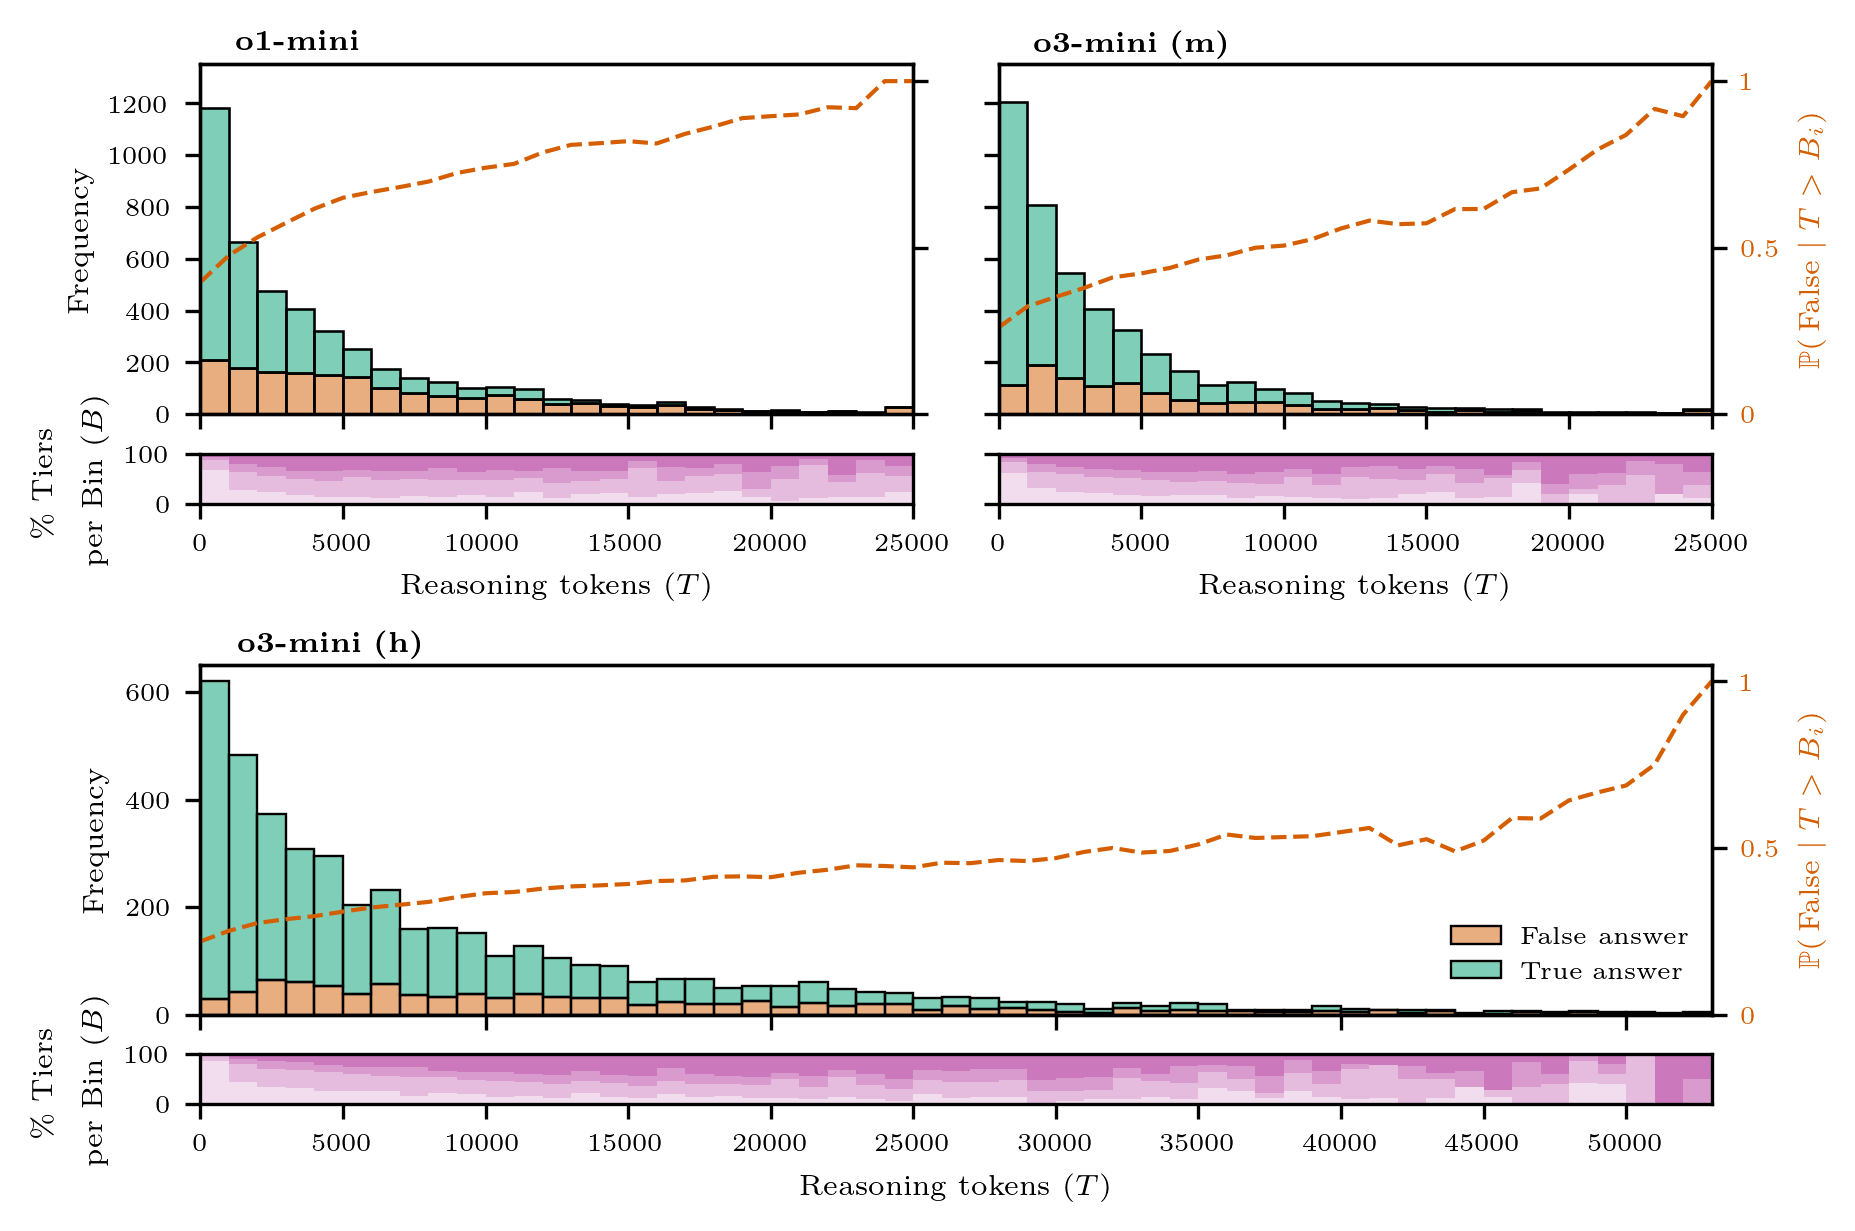

In [7]:
from performance_eval import conditional_prob

### Plot: Analysis of reasoning token usage
fig3, ax3 = plt.subplot_mosaic([['A1', 'B1'], ['A2', 'B2'], ['C1', 'C1'], ['C2', 'C2']],
                                  figsize = (6.5, 9/2),
                                  gridspec_kw={'height_ratios': [7, 1, 7, 1], 'wspace': 0.12, 'hspace': 0.4},
                                  dpi = 300)
                        
custom_palette_correctness = [ "#009E73", "#D55E00"]
custom_palette_tiers = [ "#cc78bc", '#d99acd', '#e6bcde', '#f2ddee']                           

#======================================================== o1-mini ========================================================
tokens_of_correct_questions = df_o1[df_o1['correctness'] == True]['reasoning_tokens']
tokens_of_incorrect_questions = df_o1[df_o1['correctness'] == False]['reasoning_tokens']

bins_o1, edges_o1 = np.histogram(df_o1['reasoning_tokens'], bins=25)
bins_correct_o1, edges_correct_o1 = np.histogram(tokens_of_correct_questions, bins=edges_o1)
bins_false_o1, edges_false_o1 = np.histogram(tokens_of_incorrect_questions, bins=edges_o1)

df_o1['bin'] = pd.cut(df_o1['reasoning_tokens'], bins=edges_o1, include_lowest=True)
counts_by_tier_o1 = df_o1.groupby(['bin', 'difficulty']).size().unstack(fill_value=0)
normalised_counts_by_tier_o1 = counts_by_tier_o1.div(counts_by_tier_o1.sum(axis=1), axis=0)

### Plot A1: Reasoning token distribution
sns.histplot(
    data=df_o1,
    x='reasoning_tokens',
    hue='correctness',
    hue_order=[True, False],
    bins=edges_o1,
    multiple='stack',
    edgecolor='black',
    alpha=0.5,
    palette=custom_palette_correctness,
    legend=False,
    ax=ax3['A1'],
)
ax3['A1'].set_xlabel('', fontsize = 7)
ax3['A1'].set_ylabel('Frequency', fontsize = 7)
ax3['A1'].set_xlim(0,25000)
ax3['A1'].set_ylim(0, 1350)
ax3['A1'].set_xticks([0, 5000, 10000, 15000, 20000, 25000])
ax3['A1'].set_yticks([0, 200, 400, 600, 800, 1000, 1200])
ax3['A1'].set_xticklabels([], fontsize = 6)  
ax3['A1'].set_yticklabels([0, 200, 400, 600, 800, 1000, 1200], fontsize = 6)

#Compute conditional error rate
conditional_prob_o1 = conditional_prob(bins_o1, bins_correct_o1, bins_false_o1)

#Create second y-axis to plot conditional error rate
ax_prob_o1 = ax3['A1'].twinx()
probs = conditional_prob_o1 + [1]
ax_prob_o1.plot(edges_o1, probs, color="#D55E00", linestyle='--', linewidth=1)
probability = (r"$\mathbb{P}\left(A = 0 \mid T > B_i \right)$")
ax_prob_o1.set_ylabel('', color="#E64B35", fontsize=7)  
ax_prob_o1.tick_params(axis='y', labelcolor="#E64B35")
ax_prob_o1.set_yticks([0,0.5,1])
ax_prob_o1.set_yticklabels([], fontsize = 6)
ax_prob_o1.set_ylim(0, 1+0.05)

### Plot A2: Proportion of the difficulty tiers per histogram bin 
bins_c, edges_c = np.histogram(df_o1['reasoning_tokens'], bins=25)

sns.histplot(
    data=df_o1,
    x='reasoning_tokens',
    hue='difficulty',
    hue_order=['Tier 4', 'Tier 3', 'Tier 2', 'Tier 1'],
    bins=edges_c,
    multiple='fill',  #Each bar is normalized
    edgecolor=None,
    alpha=1,
    palette=custom_palette_tiers,
    legend=False,
    ax=ax3['A2'],
)
ax3['A2'].set_xlabel(r'Reasoning tokens ($T$)', fontsize=7)
ax3['A2'].set_ylabel(r'\hspace{-3mm}\% Tiers \\ per Bin ($B$)', fontsize=7)
ax3['A2'].set_xlim(0, 25000)
ax3['A2'].set_xticks([0, 5000, 10000, 15000, 20000, 25000])
ax3['A2'].set_xticklabels([0, 5000, 10000, 15000, 20000, 25000], fontsize=6)
ax3['A2'].set_yticks([0, 1])
ax3['A2'].set_yticklabels([0,100], fontsize=6)

#======================================================== o3-mini ========================================================
tokens_of_correct_questions = df_o3[df_o3['correctness'] == True]['reasoning_tokens']
tokens_of_incorrect_questions = df_o3[df_o3['correctness'] == False]['reasoning_tokens']

bins_o3, edges_o3 = np.histogram(df_o3['reasoning_tokens'], bins=25)
bins_correct_o3, edges_correct_o3 = np.histogram(tokens_of_correct_questions, bins=edges_o3)
bins_false_o3, edges_false_o3 = np.histogram(tokens_of_incorrect_questions, bins=edges_o3)

df_o3['bin'] = pd.cut(df_o3['reasoning_tokens'], bins=edges_o3, include_lowest=True)
counts_by_tier_o3 = df_o3.groupby(['bin', 'difficulty']).size().unstack(fill_value=0)
normalised_counts_by_tier_o3 = counts_by_tier_o3.div(counts_by_tier_o3.sum(axis=1), axis=0)

### Plot B1: Reasoning token distribution
sns.histplot(
    data=df_o3,
    x='reasoning_tokens',
    hue='correctness',
    hue_order=[True, False],
    bins=edges_o3,
    multiple='stack',
    edgecolor='black',
    linestyle='-',
    alpha=0.5,
    palette=custom_palette_correctness,
    legend=False,
    ax=ax3['B1'],
    line_kws={'linewidth': 0.5, 'alpha': 0.25, 'color': 'red'}
)
ax3['B1'].set_xlabel('', fontsize = 7)
ax3['B1'].set_ylabel('', fontsize = 7)
ax3['B1'].set_xlim(0,25000)
ax3['B1'].set_ylim(0,1350)
ax3['B1'].set_xticks([0, 5000, 10000, 15000, 20000, 25000])
ax3['B1'].set_yticks([0, 200, 400, 600, 800, 1000, 1200])
ax3['B1'].set_xticklabels([], fontsize = 6)
ax3['B1'].set_yticklabels([], fontsize = 6)

#Compute conditional error rate
conditional_prob_o3 = conditional_prob(bins_o3, bins_correct_o3, bins_false_o3)

#Create second y-axis to plot conditional error rate
ax_prob_o3 = ax3['B1'].twinx()
probs = conditional_prob_o3 + [1]
ax_prob_o3.plot(edges_o3, probs, color="#D55E00", linestyle='--', linewidth=1)
probability = (r"$\mathbb{P}($\,$\text{False} \mid T > B_i)$")
ax_prob_o3.set_ylabel(probability, color="#D55E00", fontsize=7)  
ax_prob_o3.tick_params(axis='y', labelcolor="#D55E00")
ax_prob_o3.set_yticks([0,0.5,1])
ax_prob_o3.set_yticklabels([0, 0.5, 1], fontsize = 6)
ax_prob_o3.set_ylim(0, 1+0.05)

### Plot B2: Proportion of the difficulty tiers per histogram bin
bins_d, edges_d = np.histogram(df_o3['reasoning_tokens'], bins=25)

sns.histplot(
    data=df_o3,
    x='reasoning_tokens',
    hue='difficulty',
    hue_order=['Tier 4', 'Tier 3', 'Tier 2', 'Tier 1'],
    bins=edges_d,
    multiple='fill',  #Each bar is normalized
    edgecolor=None,
    alpha=1,
    palette=custom_palette_tiers,
    legend=False,
    ax=ax3['B2'],
)
    
ax3['B2'].set_xlabel(r'Reasoning tokens ($T$)', fontsize=7)
ax3['B2'].set_ylabel('', fontsize=7)
ax3['B2'].set_xlim(0, 25000)
ax3['B2'].set_xticks([0, 5000, 10000, 15000, 20000, 25000])
ax3['B2'].set_xticklabels([0, 5000, 10000, 15000, 20000, 25000], fontsize=6)
ax3['B2'].set_yticks([0, 1])
ax3['B2'].set_yticklabels([], fontsize=6)


#======================================================== o3-mini-high ========================================================
tokens_of_correct_questions = df_o3_high[df_o3_high['correctness'] == True]['reasoning_tokens']
tokens_of_incorrect_questions = df_o3_high[df_o3_high['correctness'] == False]['reasoning_tokens']

bins_o3_high, edges_o3_high = np.histogram(df_o3_high['reasoning_tokens'], bins=58)
bins_correct_o3_high, edges_correct_o3_high = np.histogram(tokens_of_correct_questions, bins=edges_o3_high)
bins_false_o3_unlimited, edges_false_o3_unlimited = np.histogram(tokens_of_incorrect_questions, bins=edges_o3_high)

df_o3_high['bin'] = pd.cut(df_o3_high['reasoning_tokens'], bins=edges_o3_high, include_lowest=True)
counts_by_tier_o3_high = df_o3_high.groupby(['bin', 'difficulty']).size().unstack(fill_value=0)

normalised_counts_by_tier_o3_high = counts_by_tier_o3_high.div(counts_by_tier_o3_high.sum(axis=1), axis=0)

edges_o3_high = np.array([1000*i for i in range(59)])

sns.histplot(
    data=df_o3_high,
    x='reasoning_tokens',
    hue='correctness',
    hue_order=[True, False],
    bins=edges_o3_high,
    multiple='stack',
    edgecolor='black',
    linestyle='-',
    alpha=0.5,
    palette=custom_palette_correctness,
    legend=False,
    ax=ax3['C1']
)

ax3['C1'].set_xlabel('', fontsize = 7)
ax3['C1'].set_ylabel('Frequency', fontsize = 7)
ax3['C1'].set_xlim(128,53000) #Cut of the last few bins for equal bin-width + they are empty or contain 1 question
ax3['C1'].set_xticks([0, 10000, 20000, 30000, 40000, 50000])
ax3['C1'].set_yticks([0,200, 400, 600])
ax3['C1'].set_xticklabels([], fontsize = 6)
ax3['C1'].set_yticklabels([0, 200, 400, 600], fontsize = 6)

conditional_prob_o3_unl = conditional_prob(bins_o3_high, bins_correct_o3_high, bins_false_o3_unlimited)

ax_prob_o3_unl = ax3['C1'].twinx()
probs = conditional_prob_o3_unl + [1]
ax_prob_o3_unl.plot(edges_o3_high, probs, color="#D55E00", linestyle='--', linewidth=1)
probability = (r"$\mathbb{P}($\,$\text{False} \mid T > B_i)$")
ax_prob_o3_unl.set_ylabel(probability, color="#D55E00", fontsize=7) 
ax_prob_o3_unl.tick_params(axis='y', labelcolor="#D55E00")
ax_prob_o3_unl.set_yticks([0,0.5,1])
ax_prob_o3_unl.set_yticklabels([0, 0.5, 1], fontsize = 6, color="#D55E00")
ax_prob_o3_unl.set_ylim(0, 1+0.05)


### Plot C2: Proportion of the difficulty tiers per histogram bin
bins_d, edges_d = np.histogram(df_o3_high['reasoning_tokens'], bins=58)

sns.histplot(
    data=df_o3_high,
    x='reasoning_tokens',
    hue='difficulty',
    hue_order=['Tier 4', 'Tier 3', 'Tier 2', 'Tier 1'],
    bins=edges_o3_high,
    multiple='fill',  #Each bar is normalized
    edgecolor=None,
    alpha=1,
    palette=custom_palette_tiers,
    legend=False,
    ax=ax3['C2'],
)

ax3['C2'].set_xlabel(r'Reasoning tokens ($T$)', fontsize=7)
ax3['C2'].set_ylabel('', fontsize=7)
ax3['C2'].set_xlim(128, 53000)
ax3['C2'].set_xticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
ax3['C2'].set_xticklabels([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000], fontsize=6)
ax3['C2'].set_yticks([0, 1])
ax3['C2'].set_yticklabels([0,100], fontsize=6)
ax3['C2'].set_ylabel(r'\hspace{-3mm}\% Tiers \\ per Bin ($B$)', fontsize=7)


#======================================================== Adjust layout ========================================================           
ax3['A1'].text(0.05, 1.1, r'\textbf{o1-mini}', horizontalalignment='left', weight= 'bold',
                  verticalalignment='top', transform=ax3['A1'].transAxes, fontsize=7
                  )
ax3['B1'].text(0.05, 1.1, r'\textbf{o3-mini (m)}', horizontalalignment='left', weight = 'bold',
                  verticalalignment='top', transform=ax3['B1'].transAxes, fontsize = 7,
                  )
ax3['C1'].text(0.025, 1.1, r'\textbf{o3-mini (h)}', horizontalalignment='left', weight = 'bold',
                  verticalalignment='top', transform=ax3['C1'].transAxes, fontsize = 7,
                  )

labels = [ 'False answer', 'True answer']
ax3['C1'].legend(labels, loc='lower right', fontsize=6, edgecolor = None, frameon = False, bbox_to_anchor=(1, 0.025))  


pos_A2 = ax3['A2'].get_position()
ax3['A2'].set_position([pos_A2.x0, pos_A2.y0+0.03, pos_A2.width, pos_A2.height])

pos_B2 = ax3['B2'].get_position()
ax3['B2'].set_position([pos_B2.x0, pos_B2.y0+0.03, pos_B2.width, pos_B2.height])

pos_C1 = ax3['C1'].get_position()
ax3['C1'].set_position([pos_C1.x0, pos_C1.y0-0.03, pos_C1.width, pos_C1.height])


plt.savefig('Figure3.png', dpi=300, bbox_inches='tight')
plt.show()
                          


# Figure 4

o3 (mini) thinks harder, not longer. This figure shows that o3-mini (m) does not require longer reasoning chains than o1-mini to achieve better accuracy and that, in general, more proficient models exhibit less accuracy decay as reasoning tokens increase.

/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_81066/3702300379.py:53: RuntimeWarning: invalid value encountered in divide
  y_3o_high = (bins_correct_o3_high / (bins_correct_o3_high + bins_false_o3_high)).tolist()[0:11]
/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_81066/3702300379.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='model', y='reasoning_tokens', data=df_plot, ax=axB,
/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_81066/3702300379.py:103: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axB.set_xticklabels([r'\textbf{o1-mini}', r'\textbf{o3-mini (m)}', r'\textbf{o3-mini (h)}'], fontsize=6)
/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_81066/3702300379.py:159: RuntimeWarning: invalid val

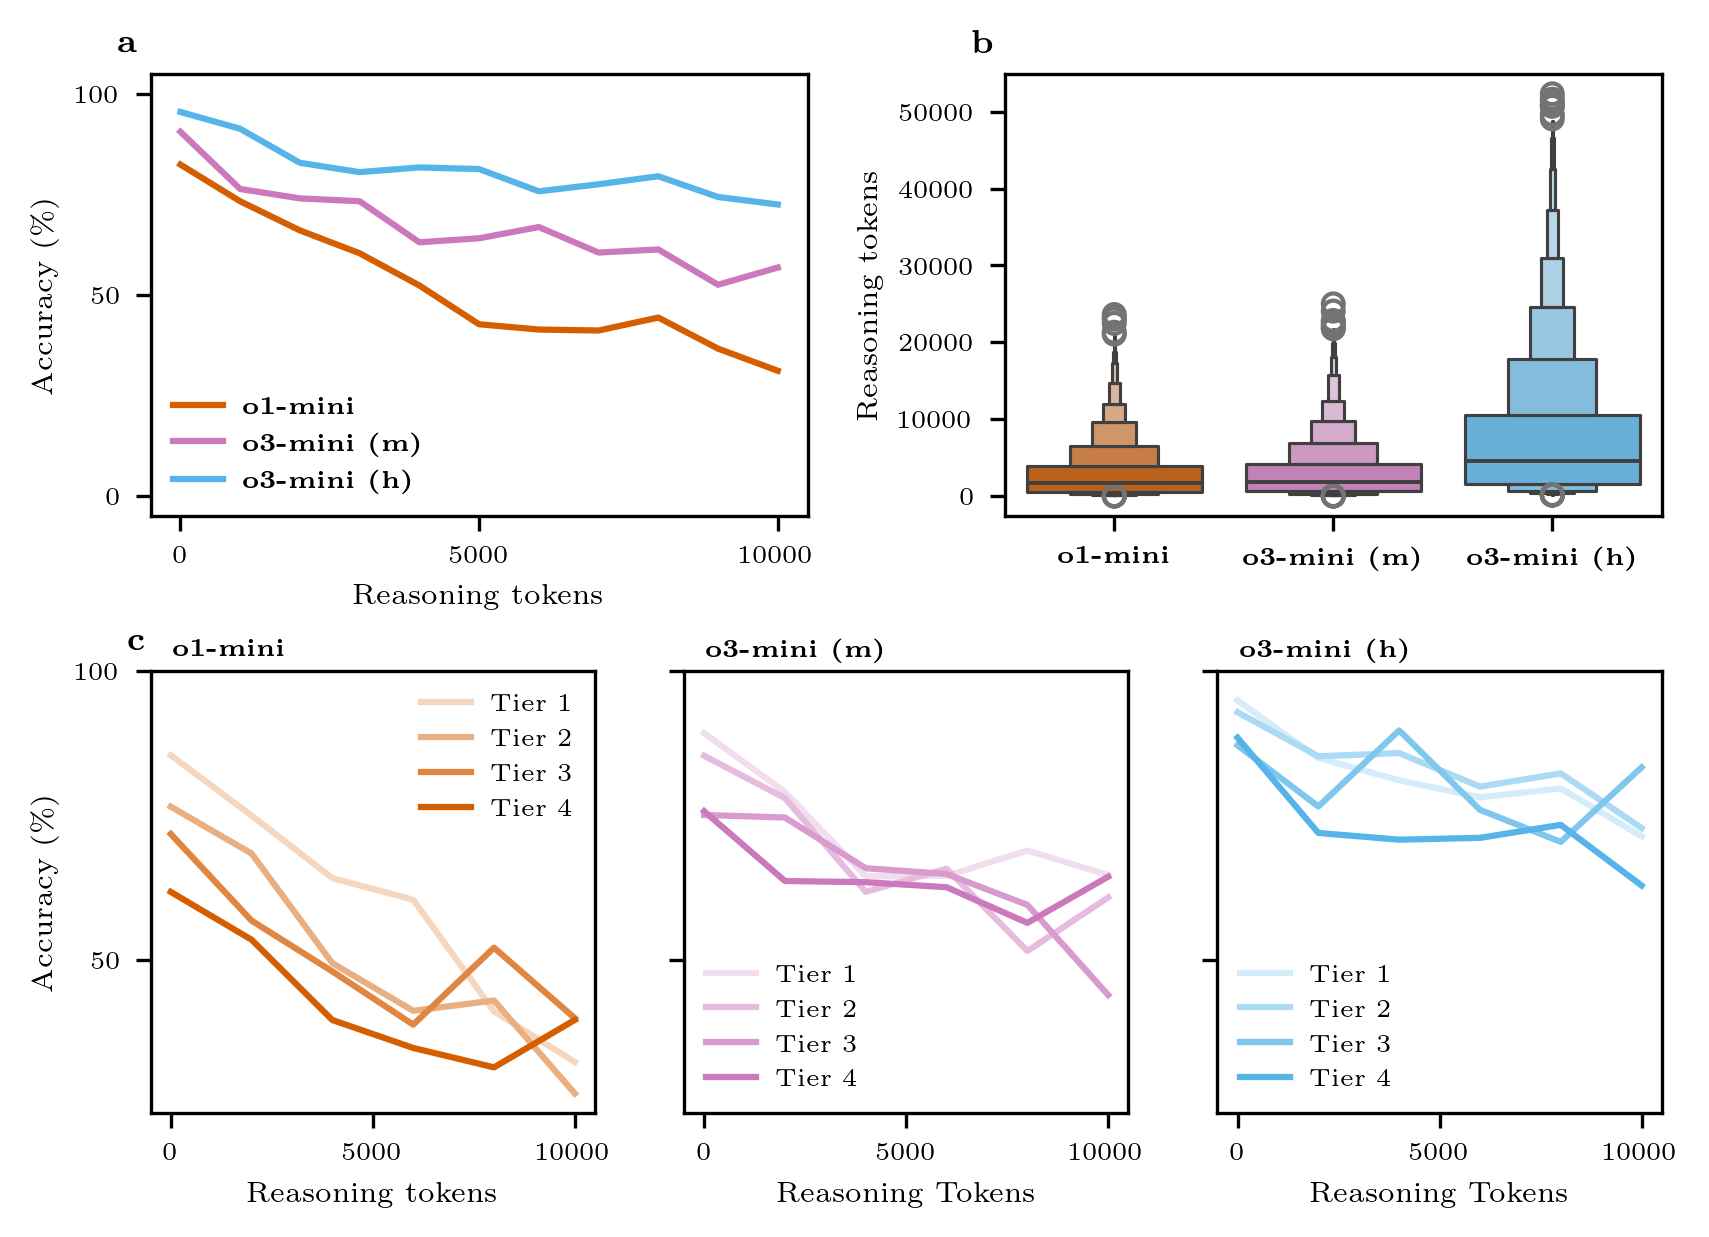

In [8]:
#Compute number of correctly and incorrectly answered questions per bin of the histograms in Figure 3
#First run the code for Figure 3 to get the dataframes for the reasoning models
from performance_eval import get_dataframe

#======================================================== gpt-4o ========================================================
df_4o = get_dataframe('omni-judge_output_4o.jsonl')
num_tiers = 4
df_4o['difficulty'] = pd.qcut(
    df_4o['difficulty'],
    q=num_tiers,
    labels=[f'Tier {i+1}' for i in range(num_tiers)]
    )

tokens_of_correct_questions = df_4o[df_4o['correctness'] == True]['completion_tokens']
tokens_of_incorrect_questions = df_4o[df_4o['correctness'] == False]['completion_tokens']

bins_4o, edges_4o = np.histogram(df_4o['completion_tokens'], bins=25)
bins_correct_4o, edges_correct_4o = np.histogram(tokens_of_correct_questions, bins=edges_4o)
bins_false_4o, edges_false_4o = np.histogram(tokens_of_incorrect_questions, bins=edges_4o)

#======================================================== o1-mini ========================================================
tokens_of_correct_questions = df_o1[df_o1['correctness'] == True]['reasoning_tokens']
tokens_of_incorrect_questions = df_o1[df_o1['correctness'] == False]['reasoning_tokens']

bins_o1, edges_o1 = np.histogram(df_o1['reasoning_tokens'], bins=25)
bins_correct_o1, edges_correct_o1 = np.histogram(tokens_of_correct_questions, bins=edges_o1)
bins_false_o1, edges_false_o1 = np.histogram(tokens_of_incorrect_questions, bins=edges_o1)

#======================================================== o3-mini (m) ========================================================
tokens_of_correct_questions = df_o3[df_o3['correctness'] == True]['reasoning_tokens']
tokens_of_incorrect_questions = df_o3[df_o3['correctness'] == False]['reasoning_tokens']

bins_o3, edges_o3 = np.histogram(df_o3['reasoning_tokens'], bins=25)
bins_correct_o3, edges_correct_o3 = np.histogram(tokens_of_correct_questions, bins=edges_o3)
bins_false_o3, edges_false_o3 = np.histogram(tokens_of_incorrect_questions, bins=edges_o3)

#======================================================== o3-mini (h) ========================================================
tokens_of_correct_questions = df_o3_high[df_o3_high['correctness'] == True]['reasoning_tokens']
tokens_of_incorrect_questions = df_o3_high[df_o3_high['correctness'] == False]['reasoning_tokens']

bins_o3_high, edges_o3_high = np.histogram(df_o3_high['reasoning_tokens'], bins=np.array([1000*i for i in range(59)]))
bins_correct_o3_high, edges_correct_o3_high = np.histogram(tokens_of_correct_questions, bins=edges_o3_high)
bins_false_o3_high, edges_false_o3_high = np.histogram(tokens_of_incorrect_questions, bins=edges_o3_high)



#We only use the first 10 bins for the analysis as the subsequent bins contain only very few questions
x_o1 = edges_o1.tolist()[0:11]
y_o1 = (bins_correct_o1 / (bins_correct_o1 + bins_false_o1)).tolist()[0:11]
x_o3 = edges_o3.tolist()[0:11]
y_o3 = (bins_correct_o3 / (bins_correct_o3 + bins_false_o3)).tolist()[0:11]
x_3o_high = edges_o3_high.tolist()[0:11]
y_3o_high = (bins_correct_o3_high / (bins_correct_o3_high + bins_false_o3_high)).tolist()[0:11]


### Plot: o3-mini thinks harder, not longer
fig4 = plt.figure(dpi=300, figsize=(6.5, 9/2))

#Main GridSpec: 2 rows, 1 column.
gs = gridspec.GridSpec(nrows=2, ncols=1, figure=fig4, hspace=0.35)

gs_top = gs[0].subgridspec(nrows=1, ncols=2, wspace=0.3)
axA = fig4.add_subplot(gs_top[0])  
axB = fig4.add_subplot(gs_top[1])  

gs_bottom = gs[1].subgridspec(nrows=1, ncols=3, wspace=0.2)
axC = fig4.add_subplot(gs_bottom[0])  
axD = fig4.add_subplot(gs_bottom[1], sharex = axC, sharey = axC)  
axE = fig4.add_subplot(gs_bottom[2], sharex = axC, sharey = axC)  

#Add a "model" column to the dataframes
df_o1['model'] = 'o1-mini'
df_o3['model'] = 'o3-mini medium'
df_o3_high['model'] = 'o3-mini high'

#Combine the dataframes
df_all = pd.concat([df_o1, df_o3, df_o3_high], ignore_index=True)
df_correct = df_all[df_all['correctness'] == True]
df_plot = df_correct[['model', 'reasoning_tokens']]

### Plot A: Accuracy vs. Reasoning tokens
axA.set_ylim(-0.05, 1.05)
axA.set_xlabel('Reasoning tokens', fontsize=7)
axA.set_ylabel(r'Accuracy ($\%$)', fontsize=7)
axA.set_xticks([0, 5000, 10000])
axA.set_xticklabels([0, 5000, 10000], fontsize=6)
axA.set_yticks([0, 0.5, 1])
axA.set_yticklabels([0, 50, 100], fontsize=6)

sns.lineplot(x=x_o1, y=y_o1, ax=axA, color='#d55e00', label=r'\textbf{o1-mini}')
sns.lineplot(x=x_o3, y=y_o3, ax=axA, color='#cc78bc', label=r'\textbf{o3-mini (m)}')
sns.lineplot(x=x_3o_high, y=y_3o_high, ax=axA, color='#56b4e9', label=r'\textbf{o3-mini (h)')

axA.legend(fontsize=6, frameon=False)


### Plot B: Distribution reasoning tokens for correctly answered questions
sns.boxenplot(x='model', y='reasoning_tokens', data=df_plot, ax=axB,
              palette=['#d55e00', '#cc78bc', '#56b4e9'])

axB.set_xlabel('', fontsize=7)
axB.set_ylabel('Reasoning tokens', fontsize=7)
axB.set_xticklabels([r'\textbf{o1-mini}', r'\textbf{o3-mini (m)}', r'\textbf{o3-mini (h)}'], fontsize=6)
axB.set_yticks([0, 10000, 20000, 30000, 40000, 50000])
axB.set_yticklabels([0, 10000, 20000, 30000, 40000, 50000], fontsize=6)

### Plots C,D,E: Accuracy vs. Reasoning tokens stratified by difficulty tier
TIERS = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4']

color_dict_o1 = {'Tier 1': '#f5d7bf', 'Tier 2': '#eaaf80', 'Tier 3': '#e08640', 'Tier 4': '#d55e00'}
color_dict_o3 = {'Tier 1': '#f2ddee', 'Tier 2': '#e6bcde', 'Tier 3': '#d99acd', 'Tier 4': "#cc78bc"}
color_dict_o3_high = {'Tier 1': '#d5ecfa', 'Tier 2': '#aadaf4', 'Tier 3': '#80c7ee', 'Tier 4': "#56b4e9"}

df_all_tier1 = df_all[df_all['difficulty'] == 'Tier 1']
df_all_tier2 = df_all[df_all['difficulty'] == 'Tier 2']
df_all_tier3 = df_all[df_all['difficulty'] == 'Tier 3']
df_all_tier4 = df_all[df_all['difficulty'] == 'Tier 4']

#We take take 2x larger bin sizes because we split the number of datapoints into 4 tiers (bins contain fewer questions)
edges_o1o3 = np.array([2000*i for i in range(13)])
edges_o3_high = np.array([2000*i for i in range(28)])

bins_o1_T1, edges_o1_T1 = np.histogram(df_all_tier1[df_all_tier1['model'] == 'o1-mini']['reasoning_tokens'], bins = edges_o1o3)
bins_o3_T1, edges_o3_T1 = np.histogram(df_all_tier1[df_all_tier1['model'] == 'o3-mini medium']['reasoning_tokens'], bins = edges_o1o3)
bins_o3_high_T1, edges_o3_high_T1 = np.histogram(df_all_tier1[df_all_tier1['model'] == 'o3-mini high']['reasoning_tokens'], bins = edges_o3_high)

bins_o1_T2, edges_o1_T2 = np.histogram(df_all_tier2[df_all_tier2['model'] == 'o1-mini']['reasoning_tokens'], bins = edges_o1o3)
bins_o3_T2, edges_o3_T2 = np.histogram(df_all_tier2[df_all_tier2['model'] == 'o3-mini medium']['reasoning_tokens'], bins = edges_o1o3)
bins_o3_high_T2, edges_o3_high_T2 = np.histogram(df_all_tier2[df_all_tier2['model'] == 'o3-mini high']['reasoning_tokens'], bins = edges_o3_high)

bins_o1_T3, edges_o1_T3 = np.histogram(df_all_tier3[df_all_tier3['model'] == 'o1-mini']['reasoning_tokens'], bins = edges_o1o3)
bins_o3_T3, edges_o3_T3 = np.histogram(df_all_tier3[df_all_tier3['model'] == 'o3-mini medium']['reasoning_tokens'], bins = edges_o1o3)
bins_o3_high_T3, edges_o3_high_T3 = np.histogram(df_all_tier3[df_all_tier3['model'] == 'o3-mini high']['reasoning_tokens'], bins = edges_o3_high)

bins_o1_T4, edges_o1_T4 = np.histogram(df_all_tier4[df_all_tier4['model'] == 'o1-mini']['reasoning_tokens'], bins = edges_o1o3)
bins_o3_T4, edges_o3_T4 = np.histogram(df_all_tier4[df_all_tier4['model'] == 'o3-mini medium']['reasoning_tokens'], bins = edges_o1o3)
bins_o3_high_T4, edges_o3_high_T4 = np.histogram(df_all_tier4[df_all_tier4['model'] == 'o3-mini high']['reasoning_tokens'], bins = edges_o3_high)

for tier in TIERS:
    df_tier = df_all[df_all['difficulty'] == tier]

    df_tier_o1 = df_tier[df_tier['model'] == 'o1-mini']
    bins_correct_o1, edges_correct_o1 = np.histogram(df_tier_o1[df_tier_o1['correctness']==True]['reasoning_tokens'], bins = edges_o1o3)
    bins_false_o1, edges_false_o1 = np.histogram(df_tier_o1[df_tier_o1['correctness']==False]['reasoning_tokens'], bins = edges_o1o3)

    df_tier_o3 = df_tier[df_tier['model'] == 'o3-mini medium']
    bins_correct_o3, edges_correct_o3 = np.histogram(df_tier_o3[df_tier_o3['correctness']==True]['reasoning_tokens'], bins = edges_o1o3)
    bins_false_o3, edges_false_o3 = np.histogram(df_tier_o3[df_tier_o3['correctness']==False]['reasoning_tokens'], bins = edges_o1o3)

    df_tier_o3_high = df_tier[df_tier['model'] == 'o3-mini high']
    bins_correct_o3_high, edges_correct_o3_high = np.histogram(df_tier_o3_high[df_tier_o3_high['correctness']==True]['reasoning_tokens'], bins = edges_o3_high)
    bins_false_o3_high, edges_false_o3_high = np.histogram(df_tier_o3_high[df_tier_o3_high['correctness']==False]['reasoning_tokens'], bins = edges_o3_high)

    x_o1 = edges_o1o3.tolist()[0:6]
    y_o1 = (bins_correct_o1/(bins_correct_o1+bins_false_o1)).tolist()[0:6]
    x_o3 = edges_o1o3.tolist()[0:6]
    y_o3 = (bins_correct_o3/(bins_correct_o3+bins_false_o3)).tolist()[0:6]
    x_o3_unl = edges_o3_high.tolist()[0:6]
    y_o3_unl = (bins_correct_o3_high/(bins_correct_o3_high+bins_false_o3_high)).tolist()[0:6]

    sns.lineplot(x=x_o1, y=y_o1, color = color_dict_o1[tier], ax = axC, linestyle='-')
    sns.lineplot(x=x_o3, y=y_o3, color = color_dict_o3[tier], ax = axD, linestyle='-')
    sns.lineplot(x=x_o3_unl, y=y_o3_unl, color = color_dict_o3_high[tier], ax = axE, linestyle='-')


axC.set_xticks([0,5000, 10000])
axC.set_xticklabels([0, 5000, 10000], fontsize = 6)

axC.set_ylabel(r'Accuracy ($\%$)', fontsize = 7)
axC.set_xlabel('Reasoning tokens', fontsize = 7)

axD.set_xticklabels([0,5000, 10000], fontsize = 6)
axD.set_xlabel('Reasoning Tokens', fontsize = 7)
axD.set_yticks([0.5, 1])
axD.set_yticklabels([], fontsize = 6)
axD.set_xticks([0,5000, 10000])
axD.set_xticklabels([0, 5000, 10000], fontsize = 6)

axE.set_yticks([0.5, 1])
axE.set_yticklabels([], fontsize = 6)
axE.set_xticks([0,5000, 10000])
axE.set_xticklabels([0,5000, 10000], fontsize = 6)

axE.set_xticklabels([0,5000, 10000], fontsize = 6)
axE.set_xlabel('Reasoning Tokens', fontsize = 7)

#======================================================== Adjust layout ========================================================
axA.text(-0.05, 1.1, r'\textbf{a}', horizontalalignment='left', weight= 'bold',
                  verticalalignment='top', transform=axA.transAxes, fontsize=8
                  )
axB.text(-0.05, 1.1, r'\textbf{b}', horizontalalignment='left', weight = 'bold',
                  verticalalignment='top', transform=axB.transAxes, fontsize = 8
                  )
axC.text(-0.05, 1.1, r'\textbf{c}', horizontalalignment='left', weight= 'bold',
                  verticalalignment='top', transform=axC.transAxes, fontsize=8)


axC.text(0.05, 1.075, r'\textbf{o1-mini}', horizontalalignment='left', weight= 'bold',
                  verticalalignment='top', transform=axC.transAxes, fontsize=6
               )
axD.text(0.05, 1.075, r'\textbf{o3-mini (m)}', horizontalalignment='left', weight= 'bold',
                  verticalalignment='top', transform=axD.transAxes, fontsize=6
               )
axE.text(0.05, 1.075, r'\textbf{o3-mini (h)}', horizontalalignment='left', weight= 'bold',
                  verticalalignment='top', transform=axE.transAxes, fontsize=6
               )
axC.set_yticks([0.5, 1])
axC.set_yticklabels([50, 100], fontsize = 6)

for ax in [axD, axE]:
    ax.tick_params(labelleft=False)

custom_handles_o1 = [
        mlines.Line2D([], [], color=color, lw=1.5, label=f'Tier {i+1}')
        for i, color in enumerate(color_dict_o1.values())
    ]

custom_handles_o3 = [
         mlines.Line2D([], [], color=color, lw=1.5, label=f'Tier {i+1}')
         for i, color in enumerate(color_dict_o3.values())
    ]

custom_handles_o3_unl = [
         mlines.Line2D([], [], color=color, lw=1.5, label=f'Tier {i+1}')
         for i, color in enumerate(color_dict_o3_high.values())
    ]

axC.legend(custom_handles_o1, TIERS, fontsize=6, frameon=False, ncol=1, loc = 'upper right')
axD.legend(custom_handles_o3, TIERS, fontsize=6, frameon=False, ncol=1, loc = 'lower left')
axE.legend(custom_handles_o3_unl, TIERS, fontsize=6, frameon=False, ncol=1, loc = 'lower left')

plt.savefig('Figure4.png', dpi=300, bbox_inches='tight')
plt.show()